# Data Profiling and Cleaning

We profiled and cleaned the NYC opendata `DOB NOW: Electrical Permit Applications` data using pandas and openclean

Run all the cells in order to profile and clean the data

Note: many of these fields are accurate and did not need to be fixed

Robert Ronan, Sheng Tong, Jerry Lee

In [1]:
import openclean
import glob
import pandas as pd
import numpy as np


# Data Downloading

Download the data using openClean

In [2]:
import gzip
import humanfriendly
import os

from openclean.data.source.socrata import Socrata

dataset = Socrata().dataset('dm9a-ab7w')
datafile = './dm9a-ab7w.tsv.gz'

if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)


fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

Using 'DOB NOW: Electrical Permit Applications' in file ./dm9a-ab7w.tsv.gz of size 40.86 MB


# Data Loading

Load the data into pandas and openClean dataset object

In [3]:
import pandas as pd
from openclean.pipeline import stream

df  = pd.read_csv(datafile, dtype='object', sep='\t')
ds = stream(datafile)

In [4]:
np.__version__

'1.21.4'

In [5]:
pd.__version__

'1.3.4'

In [6]:
import glob

In [7]:
glob.glob("*")

['bty7-2jhb.tsv.gz',
 'cleaned_data.csv',
 'dm9a-ab7w.tsv.gz',
 'DOB_Job_Cleaning.ipynb',
 'DOB_NOW_BUILD.ipynb',
 'DOB_NOW_Electrical.ipynb',
 'Historical_DOB_Permit.ipynb',
 'ic3t-wcy2.tsv.gz',
 'README.md',
 'w9ak-ipjd.tsv.gz']

### Get some basic info about the dataset columns

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255024 entries, 0 to 255023
Data columns (total 84 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   JOB_FILING_NUMBER                  255024 non-null  object
 1   JOB_NUMBER                         255024 non-null  object
 2   FILING_NUMBER                      255024 non-null  object
 3   FILING_DATE                        255024 non-null  object
 4   FILING_TYPE                        255024 non-null  object
 5   FILING_STATUS                      255024 non-null  object
 6   JOB_STATUS                         255024 non-null  object
 7   HOUSE_NUMBER                       255024 non-null  object
 8   STREET_NAME                        255024 non-null  object
 9   BOROUGH                            255024 non-null  object
 10  ZIP_CODE                           255024 non-null  object
 11  BLOCK                              255024 non-null  

If any rows are complete duplicates, drop them

In [9]:
df = df.drop_duplicates()

Take an a look at some of the rows to get an idea of what the datset looks like

In [10]:
df

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
0,B00083823-P1,B00083823,P1,06/02/2021 12:00:00 AM,PAA,Approved,Job in Process,2438,EAST 7 STREET,BROOKLYN,...,40,0,NaN,40.590828,-73.962756,48,370,3195471,3072030014,Brighton Beach
1,B00143086-P1,B00143086,P1,04/27/2021 12:00:00 AM,PAA,Approved,Job in Process,601,OCEAN VIEW AVENUE,BROOKLYN,...,40,0,NaN,40.579607,-73.962071,48,364,3244470,3086660610,Brighton Beach
2,B00262288-P1,B00262288,P1,06/02/2021 12:00:00 AM,PAA,Approved,Job in Process,84,WITHERS STREET,BROOKLYN,...,40,0,NaN,40.716973,-73.948873,34,501,3068248,3027420015,East Williamsburg
3,B00304119-P3,B00304119,P3,06/02/2021 12:00:00 AM,PAA,Approved,Job in Process,85,3 STREET,BROOKLYN,...,40,0,NaN,40.677481,-73.992963,39,77,3007911,3004610058,Carroll Gardens-Columbia Street-Red Hook
4,B00304755-P2,B00304755,P2,06/02/2021 12:00:00 AM,PAA,Approved,Job in Process,251,WALLABOUT STREET,BROOKLYN,...,40,0,NaN,40.701158,-73.949433,33,507,3000000,3022490037,Bedford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255019,X00509655-I1-EL,X00509655,I1,04/23/2021 12:00:00 AM,New Job Filing,Complete,Job is complete,2800,SEXTON PLACE,BRONX,...,40,0,Check,40.869531,-73.847275,12,350,2055363,2045640057,Allerton-Pelham Gardens
255020,X00509920-I1-EL,X00509920,I1,04/24/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,2661,MARION AVENUE,BRONX,...,40,0,Credit Card,40.864804,-73.890606,15,40502,2016643,2032870100,Bedford Park-Fordham North
255021,X00509978-I1-EL,X00509978,I1,04/25/2021 12:00:00 AM,New Job Filing,Complete,Job is complete,1914,BUSSING AVENUE,BRONX,...,40,0,Credit Card,40.894850,-73.846732,12,428,2068841,2050140004,Woodlawn-Wakefield
255022,X00509951-I1-EL,X00509951,I1,04/25/2021 12:00:00 AM,New Job Filing,Complete,Job is complete,2832,SAMPSON AVENUE,BRONX,...,40,0,Check,40.819668,-73.820422,13,132,2080582,2055780082,Schuylerville-Throgs Neck-Edgewater Park


In [11]:
# Need 382 examples for sample

In [12]:
df_sample = df.sample(382).copy()

In [13]:
df_sample

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
43844,Q00579889-I1-EL,Q00579889,I1,08/19/2021 12:00:00 AM,New Job Filing,Complete,Job is complete,13-01,JACKSON AVENUE,QUEENS,...,15,0,Credit Card,40.744171,-73.949523,26,7,4000487,4000570008,Hunters Point-Sunnyside-West Maspeth
254332,X00510896-I1-EL,X00510896,I1,04/26/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,615,FAILE STREET,BRONX,...,40,0,Check,40.812788,-73.886045,17,93,2006691,2027660029,Hunts Point
138666,M00078961-I1-EL,M00078961,I1,09/23/2018 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,529,EAST 87 STREET,MANHATTAN,...,40,0,Credit Card,40.776263,-73.945802,5,14402,1051322,1015847502,Yorkville
241480,X00071460-I1-EL,X00071460,I1,08/16/2018 12:00:00 AM,New Job Filing,Complete,Job is complete,180,BROOK AVENUE,BRONX,...,0,0,NaN,40.806073,-73.920297,8,25,2090987,2022630019,Mott Haven-Port Morris
96276,B00169550-I1-EL,B00169550,I1,05/21/2019 12:00:00 AM,New Job Filing,Complete,Job is complete,741,FULTON STREET,BROOKLYN,...,40,0,Check,40.686528,-73.974944,35,35,3059294,3021160005,Fort Greene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18624,Q00531465-I1-EL,Q00531465,I1,05/31/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,97-37,89 STREET,QUEENS,...,40,0,Credit Card,40.684229,-73.851813,32,38,4188422,4090630043,Woodhaven
154164,M00175502-I1-EL,M00175502,I1,06/03/2019 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,854,WEST 180 STREET,MANHATTAN,...,40,0,Check,40.850258,-73.940095,10,265,1064320,1021770163,Washington Heights South
144573,M00113908-P1,M00113908,P1,10/09/2019 12:00:00 AM,PAA,Approved,Job in Process,303,WEST 137 STREET,MANHATTAN,...,40,0,NaN,40.817923,-73.945869,9,22102,1060648,1020410014,Central Harlem North-Polo Grounds
173038,M00365171-I1-EL,M00365171,I1,07/01/2020 12:00:00 AM,New Job Filing,Complete,Job is complete,220,EAST 42 STREET,MANHATTAN,...,40,0,Check,40.750256,-73.973256,4,88,1037546,1013157501,Turtle Bay-East Midtown


## Describe columns in groups so they fit on screen

In [14]:
df[df.columns[:20]].describe()

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,ZIP_CODE,BLOCK,LOT,BIN,COMMUNITY_BOARD,JOINT_VENTURE_WORK,BUILDING_USE_TYPE,APPLICANT_FIRST_NAME,APPLICANT_LAST_NAME,LICENSE_TYPE
count,255024,255024,255024,255024,255024,255024,255024,255024,255024,255024,255024,255024,255024,255024,255024,255024,255024,255017,255017,255024
unique,255024,219429,35,1453,3,9,3,21459,7397,5,223,12985,1063,112708,70,2,15,755,1587,1
top,B00083823-P1,M00017941,I1,05/12/2021 12:00:00 AM,New Job Filing,Complete,Job in Process,1,BROADWAY,MANHATTAN,10022,3175,1,4433859,105,No,L Five or more Family,RICHARD,NEU,Electrician
freq,1,22,219156,530,219156,123918,127251,1357,4789,87297,4410,1104,30361,378,16172,254655,74445,9018,6681,255024


In [15]:
# Nothing seems odd maybe ZIP_CODE?

In [16]:
df[df.columns[20:40]].describe()

,LICENSE_NUMBER,FIRM_NAME,FIRM_NUMBER,FIRM_ADDRESS,CITY,STATE,ZIP,GENERAL_LIABILITY_COMPANY,GENERAL_LIABILITY_POLICY,GENERAL_LIABILITY_EXPIRATION_DATE,WORKER_COMP_COMPANY_NAME,WORKER_COMP_POLICY,WORKER_COMP_EXPIRATION_DATE,DISABILITY_COMPANY_NAME,DISABILITY_POLICY,DISABILITY_EXPIRATION_DATE,OWNER_FIRST_NAME,OWNER_LAST_NAME,TITLE,BUSINESS_NAME
count,255017,255018,255015,255018,255016,255016,255016,255024,254952,255024,255024,254949,255024,255024,254949,255024,250347,250374,0,146588
unique,1814,1787,1752,1833,76,2,208,1043,4250,1746,548,3621,1699,342,2835,1734,35835,59912,0,40977
top,011545,RICHARD NEU,003052,4347 HYLAN BLVD,BROOKLYN,NY,11101,MERCHANTS MUTUAL INS CO,UDC208802CGL21,10/19/2022 12:00:00 AM,NEW YORK STATE INS FUND,2020-070125,11/01/2022 12:00:00 AM,SHELTERPOINT LIFE INS CO,2020-070125,12/31/2021 12:00:00 AM,MICHAEL,SINGH,NaN,PR
freq,6667,6680,6666,6707,79976,255011,17906,13180,5411,5429,27741,5840,12016,45914,5840,20287,3284,7339,NaN,9807


In [17]:
# Owner's stuff is pretty consistent with our original data

In [18]:
df[df.columns[40:60]].describe()

,OWNER_ADDRESS,OWNER_CITY,OWNER_STATE,OWNER_ZIP,OWNER_TYPE,AUTH_REP_FIRST_NAME,AUTH_REP_LAST_NAME,AUTH_REP_OWNER_RELATION,COO_RELATED,CONST_BIS_JOB_NUMBER,REMOVAL_OF_VIO_OR_OWNER,SVC_WORK_NOTIFY_UTILITY,GENERAL_WIRING,LIGHTING_WORK,TEMP_CONSTRUCTION_SVC,TEMP_LIGHT_POWER,HVAC_WIRING,BOILER_BURNER_WIRING,CATEGORY_WORK_LIST,3_WIRE
count,53,66,66,66,255019,65015,64113,61882,255024,16410,255024,255024,255024,255024,255024,255024,255024,255024,79775,255024
unique,43,22,5,43,8,9295,16050,2605,2,10886,2,2,2,2,2,2,2,2,13,240
top,30S Wacker Drive Suite 900,BROOKLYN,NY,60606,Individual,RICHARD,NEU,Contractor,No,121204552,No,No,Yes,No,No,No,No,No,Sidewalk Shed Wiring & Lighting,0
freq,4,16,52,4,122714,2863,2620,4250,238594,11,245207,196882,137937,248166,252828,245494,253670,253464,23903,207594


In [19]:
df[df.columns[60:80]].describe()

,4_WIRE,10_POINTS,EXISTING_METERS,NEW_METERS,REMOVE_METERS,TOTAL_METERS,JOB_DESCRIPTION,PERMIT_ISSUED_DATE,JOB_START_DATE,COMPLETION_DATE,FILING_FEE,LEGALIZATION_FEE,NOGOOD_CHECK_FEE,TOTAL_BILLABLE_WORK_FEE,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT
count,255024,255024,255024,255024,255024,255024,254846,223635,255023,255023,255024,255024,255024,255024,255024,255024,218086,254715,254715,254715
unique,52,24,185,232,104,262,156202,1451,1489,2939,3,129,4,7478,137,8,2,95354,95951,51
top,0,0,0,0,0,0,INSTALLATION OF LIGHTING FOR SIDEWALK SHED,05/12/2021 12:00:00 AM,05/12/2021 12:00:00 AM,12/31/2021 12:00:00 AM,40,0,0,0,40,0,Credit Card,40.723485,-73.848490,4
freq,240509,244077,207388,202642,225131,192608,2339,455,400,2236,202467,254755,254397,53845,232422,254936,137640,378,378,21841


In [20]:
# GIS is the same

In [21]:
df[df.columns[80:100]].describe()

,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
count,254715,252602,252602,254715
unique,1321,108103,105139,194
top,7,3000000,4031750001,Midtown-Midtown South
freq,1413,2756,1067,11698


In [22]:
# More GIS stuff

In [23]:
df.columns

Index(['JOB_FILING_NUMBER', 'JOB_NUMBER', 'FILING_NUMBER', 'FILING_DATE',
       'FILING_TYPE', 'FILING_STATUS', 'JOB_STATUS', 'HOUSE_NUMBER',
       'STREET_NAME', 'BOROUGH', 'ZIP_CODE', 'BLOCK', 'LOT', 'BIN',
       'COMMUNITY_BOARD', 'JOINT_VENTURE_WORK', 'BUILDING_USE_TYPE',
       'APPLICANT_FIRST_NAME', 'APPLICANT_LAST_NAME', 'LICENSE_TYPE',
       'LICENSE_NUMBER', 'FIRM_NAME', 'FIRM_NUMBER', 'FIRM_ADDRESS', 'CITY',
       'STATE', 'ZIP', 'GENERAL_LIABILITY_COMPANY', 'GENERAL_LIABILITY_POLICY',
       'GENERAL_LIABILITY_EXPIRATION_DATE', 'WORKER_COMP_COMPANY_NAME',
       'WORKER_COMP_POLICY', 'WORKER_COMP_EXPIRATION_DATE',
       'DISABILITY_COMPANY_NAME', 'DISABILITY_POLICY',
       'DISABILITY_EXPIRATION_DATE', 'OWNER_FIRST_NAME', 'OWNER_LAST_NAME',
       'TITLE', 'BUSINESS_NAME', 'OWNER_ADDRESS', 'OWNER_CITY', 'OWNER_STATE',
       'OWNER_ZIP', 'OWNER_TYPE', 'AUTH_REP_FIRST_NAME', 'AUTH_REP_LAST_NAME',
       'AUTH_REP_OWNER_RELATION', 'COO_RELATED', 'CONST_BIS_JOB_NUMBER',

## Renaming columns

In [24]:
df = df.rename(columns={
                          "Owner'sPhone #": "Owner's Phone #" 
                        , "Owner'sHouse Street Name": "OWNER_ADDRESS"
                        , "Paid": "Paid Date"
                        , "Fully Paid": "Fully Paid Date"
                        , "Assigned": "Assigned Date"
                        , "Approved": "Approved Date"
                        , "Job Status Descrp": "Job Status Description"
                        , "Community - Board": "Community Board"
                        , "Adult Estab": "Adult Establishment"
                        , "Pre- Filing Date": "Pre-Filing Date"
                        , "Total Est. Fee": "AMOUNT_DUE"
                        , "Horizontal Enlrgmt": "Horizontal Enlargement"
                        , "Vertical Enlrgmt": "Vertical Enlargement"
                        , "ExistingNo. of Stories": "Existing # of Stories"
                        , "Proposed No. of Stories": "Proposed # of Stories"
                        , "Zoning Dist1": "Zoning District 1"
                        , "Zoning Dist2": "Zoning District 2"
                        , "Zoning Dist3": "Zoning District 3"
                        , "City ": "OWNER_CITY"
                        , "State": "OWNER_STATE"
                        , "Zip": "OWNER_ZIP"
                        , "DOBRunDate": "DOB Run Date"
                       })

#Lower cased but not sure if this is necessary
'''
df = df.rename(columns={
                        , "JOB_S1_NO": "Job S1 #"
                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"
                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"
                        , "SIGNOFF_DATE": "Signoff Date"
                        , "SPECIAL_ACTION_STATUS": "Special Action Status"
                        , "SPECIAL_ACTION_DATE": "Special Action Date"
                        , "BUILDING_CLASS": "Building Class"
                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"
                        , "GIS_LATITUDE": "GIS Latitude"
                        , "GIS_LONGITUDE": "GIS Longitude"
                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"
                        , "GIS_CENSUS_TRACT": "GIS Census Tract"
                        , "GIS_NTA_NAME": "GIS NTA Name"
                        , "GIS_BIN": "GIS Bin"
                        })
'''

'\ndf = df.rename(columns={\n                        , "JOB_S1_NO": "Job S1 #"\n                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"\n                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"\n                        , "SIGNOFF_DATE": "Signoff Date"\n                        , "SPECIAL_ACTION_STATUS": "Special Action Status"\n                        , "SPECIAL_ACTION_DATE": "Special Action Date"\n                        , "BUILDING_CLASS": "Building Class"\n                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"\n                        , "GIS_LATITUDE": "GIS Latitude"\n                        , "GIS_LONGITUDE": "GIS Longitude"\n                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"\n                        , "GIS_CENSUS_TRACT": "GIS Census Tract"\n                        , "GIS_NTA_NAME": "GIS NTA Name"\n                        , "GIS_BIN": "GIS Bin"\n                        })\n'

#### Method to get an idea of the top 10 values of a column

In [25]:
def show_vals(column_name, show_rows=10, df=df):
    print("Top {} {}:\n".format(show_rows, column_name))
    print(df[column_name].value_counts(dropna=False)[:show_rows])
    print()

### Examining JOB_NUMBERs (replaced Job # with JOB_NUMBERS)

Some repition in the JOB_NUMBER's, but nothing major. We will check some of the repeated JOB_NUMBERs to be sure they actually refer to the same jobs

In [26]:
df['JOB_NUMBER'].value_counts(dropna=False)

M00017941    22
M00458107    22
M00165218    20
M00017987    19
M00017985    15
             ..
B00082117     1
B00082119     1
B00082121     1
B00082126     1
X00509967     1
Name: JOB_NUMBER, Length: 219429, dtype: int64

Nothing weird looking here

In [27]:
df['JOB_NUMBER'].min()

'B00003100'

In [28]:
df['JOB_NUMBER'].max()

'X00642889'

No JOB_NUMBERs starting with 0, so there are integer values, unlike Doc # which has values 01, 02, etc.

In [29]:
df.loc[df['JOB_NUMBER'].str.startswith('0')]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME


Fraction of Rows with unique job numbers

In [30]:
df['JOB_NUMBER'].nunique()/df['JOB_NUMBER'].count()

0.8604249011857708

Group by JOB_NUMBER and check if latitude and longitude are the same all the same for the job, which would indicate different instances of the JOB_NUMBER all refer to the same Job.

In [31]:
group = df[['JOB_NUMBER', 'GIS_LATITUDE', 'GIS_LONGITUDE']].groupby('JOB_NUMBER')

This will take a little while to run

In [32]:
tranformed = group.aggregate(lambda x: x.unique().shape[0])

Jobs with multiple latitude and longitudes:

In [33]:
# 7 potential bad jobs
tranformed.loc[(tranformed['GIS_LATITUDE']!=1)
              |(tranformed['GIS_LONGITUDE']!=1)]

,GIS_LATITUDE,GIS_LONGITUDE
JOB_NUMBER,,
B00051005,2,2
M00110850,2,2
M00350920,2,2
M00350922,2,2
Q00069104,2,2
S00273177,2,2
X00374678,2,2


In [34]:
potential_bad_jobs = list(tranformed.loc[(tranformed['GIS_LATITUDE']!=1)
              |(tranformed['GIS_LONGITUDE']!=1)].index.unique())

Separate these into a temporary dataframe to play around with:

In [35]:
df_temp = df.loc[df['JOB_NUMBER'].isin(potential_bad_jobs)].copy()

In [36]:
df_temp = df_temp.sort_values(['JOB_NUMBER', 'GIS_LATITUDE', 'GIS_LONGITUDE'])

Most of these are just missing lat and long values.

The others look to be Jobs that manage multiple houses/lots in a small area, so are probably correct

In [37]:
df_temp[df_temp.duplicated(subset=['JOB_NUMBER', 'BLOCK', 'LOT', 'BIN'], keep=False)]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
80646,B00051005-P1,B00051005,P1,06/22/2020 12:00:00 AM,PAA,Approved,Job in Process,1090,MYRTLE AVENUE,BROOKLYN,...,40,0,NaN,40.696771,-73.937006,36,287,3042894,3015860008,Stuyvesant Heights
80645,B00051005-I1-EL,B00051005,I1,06/08/2018 12:00:00 AM,New Job Filing,Complete,Job is complete,1092,MYRTLE AVENUE,BROOKLYN,...,40,0,Credit Card,40.696779,-73.936941,36,287,3000000,3015860008,Stuyvesant Heights
18039,M00350920-P1,M00350920,P1,05/21/2020 12:00:00 AM,PAA,Approved,Job in Process,601,WEST 29 STREET,MANHATTAN,...,40,0,NaN,40.752825,-74.004681,3,99,1012272,1006750012,Hudson Yards-Chelsea-Flatiron-Union Square
61597,M00350920-I1-EL,M00350920,I1,05/21/2020 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,311,11 AVENUE,MANHATTAN,...,40,0,Credit Card,40.753012,-74.004017,3,99,1012273,1006750012,Hudson Yards-Chelsea-Flatiron-Union Square
18041,M00350922-P1,M00350922,P1,05/21/2020 12:00:00 AM,PAA,Approved,Job in Process,601,WEST 29 STREET,MANHATTAN,...,40,0,NaN,40.752825,-74.004681,3,99,1012272,1006750012,Hudson Yards-Chelsea-Flatiron-Union Square
61599,M00350922-I1-EL,M00350922,I1,05/21/2020 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,311,11 AVENUE,MANHATTAN,...,40,0,Credit Card,40.753012,-74.004017,3,99,1012273,1006750012,Hudson Yards-Chelsea-Flatiron-Union Square
193496,Q00069104-P1,Q00069104,P1,08/08/2018 12:00:00 AM,PAA,Approved,Job in Process,146-34,GEORGIA ROAD,QUEENS,...,40,0,NaN,40.754569,-73.815841,20,1201,4117558,4052060017,East Flushing
193495,Q00069104-I1-EL,Q00069104,I1,08/08/2018 12:00:00 AM,New Job Filing,Cancel,Inspection not complete due to withdrawal,146-36,GEORGIA ROAD,QUEENS,...,40,0,Credit Card,40.754583,-73.815819,20,1201,4000000,4052060017,East Flushing
251745,X00374678-P1,X00374678,P1,07/23/2020 12:00:00 AM,PAA,Approved,Job in Process,423,WESTCHESTER AVENUE,BRONX,...,40,0,NaN,40.816467,-73.916068,17,71,2000000,2023620025,Melrose South-Mott Haven North
251746,X00374678-P2,X00374678,P2,08/12/2020 12:00:00 AM,PAA,Approved,Job in Process,423,WESTCHESTER AVENUE,BRONX,...,40,0,NaN,40.816467,-73.916068,17,71,2000000,2023620025,Melrose South-Mott Haven North


#### Later, after we have cleaned more values, we will fill these missing values by JOB_NUMBER

Remove Jobs we know to be just missing data from the list of bad jobs

In [38]:
not_bad_jobs = df_temp[df_temp.duplicated(subset=['JOB_NUMBER', 'BLOCK', 'LOT', 'BIN'], keep=False)]['JOB_NUMBER'].unique()

In [39]:
df_temp = df_temp.loc[~df_temp['JOB_NUMBER'].isin(not_bad_jobs)]

All of these are jobs that handle multiple lots or HOUSE_NUMBERs, which explains why the lat/long change 

JOB_NUMBER 122171130 and 122222638 may be exact copies of each other though

In [40]:
df_temp

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
10611,M00110850-I1-EL,M00110850,I1,12/17/2018 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,135,SULLIVAN STREET,MANHATTAN,...,40,0,Credit Card,40.726753,-74.002121,3,49,1008039,1005170001,SoHo-TriBeCa-Civic Center-Little Italy
144112,M00110850-P1,M00110850,P1,12/29/2018 12:00:00 AM,PAA,Approved,Job in Process,77-17,QUEENS BOULEVARD,QUEENS,...,40,0,NaN,40.738535,-73.886674,25,485,4038413,4015360107,Elmhurst-Maspeth
35478,S00273177-P1,S00273177,P1,09/29/2020 12:00:00 AM,PAA,Approved,Job in Process,669,CASTLETON AVENUE,STATEN ISLAND,...,40,0,NaN,40.634709,-74.103894,49,67,5002229,5001010002,New Brighton-Silver Lake
233719,S00273177-I1-EL,S00273177,I1,11/27/2019 12:00:00 AM,New Job Filing,Complete,Job is complete,267P,KISSEL AVENUE,STATEN ISLAND,...,40,0,Check,40.637881,-74.104591,49,67,NaN,NaN,New Brighton-Silver Lake


In [41]:
df_temp = df_temp.loc[(df_temp['JOB_NUMBER'].isin(['122171130', '122222638']))]

Latest action date is different, so its probably differnt but very similar jobs 

In [42]:
df_temp[df_temp.columns[0:20]]


,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,ZIP_CODE,BLOCK,LOT,BIN,COMMUNITY_BOARD,JOINT_VENTURE_WORK,BUILDING_USE_TYPE,APPLICANT_FIRST_NAME,APPLICANT_LAST_NAME,LICENSE_TYPE


Check if any JOB_NUMBERs have non-digit values

In [43]:
df['JOB_NUMBER'] = df['JOB_NUMBER'].astype('str')

In [44]:
df.loc[(~df['JOB_NUMBER'].isna())
       &(~df['JOB_NUMBER'].str.isdigit())]['JOB_NUMBER']

0         B00083823
1         B00143086
2         B00262288
3         B00304119
4         B00304755
            ...    
255019    X00509655
255020    X00509920
255021    X00509978
255022    X00509951
255023    X00509967
Name: JOB_NUMBER, Length: 255024, dtype: object

All JOB_NUMBERs entirely composed of digits, so we cast them to ints

In [45]:
df['JOB_NUMBER'].describe()

count        255024
unique       219429
top       M00017941
freq             22
Name: JOB_NUMBER, dtype: object

## Examining and reparing HOUSE_NUMBERs

HOUSE_NUMBER's appear to be mostly ints

However, there are legitimate house numbers with dashes so we'll have to make them strings

In [46]:
show_vals('HOUSE_NUMBER', show_rows=10)

Top 10 HOUSE_NUMBER:

1      1357
200    1308
10     1007
100     992
30      918
150     852
15      838
50      827
40      800
25      788
Name: HOUSE_NUMBER, dtype: int64



Replace NaN values with empty strings, then convert column to string, and make everything uppercase


In [47]:
df['HOUSE_NUMBER'].fillna('', inplace=True)
df['HOUSE_NUMBER'] = df['HOUSE_NUMBER'].astype('str')
df['HOUSE_NUMBER'] = df['HOUSE_NUMBER'].str.upper()

Check for numbers spelled out as words

In [48]:
df.loc[(~df['HOUSE_NUMBER'].isna())
       &(df['HOUSE_NUMBER'].str.isalpha())]['HOUSE_NUMBER']

6714        ONE
12076       ONE
12808       ONE
13517     SEVEN
13890       TEN
17854       ONE
21849       ONE
23969       ONE
29671       ONE
39028       ONE
51566       ONE
51567       ONE
51766       ONE
53639       ONE
56620       ONE
57119       ONE
66504       ONE
95035       ONE
109601      ONE
111614      ONE
112391      ONE
113643      ONE
124382      ONE
133203      ONE
134857      ONE
136607      ONE
145251      ONE
145491      ONE
145493      ONE
147281      ONE
147282      ONE
156358      ONE
157334      ONE
157835      ONE
164055      ONE
167167      ONE
167168      ONE
170095      ONE
170380      ONE
171477      ONE
173096      ONE
177573      ONE
177706      ONE
178091      ONE
178245      ONE
181545      ONE
182433      ONE
182950      ONE
183107      SIX
183111    SEVEN
183112    SEVEN
183113    SEVEN
183286      ONE
183474      ONE
216561      ONE
221000      ONE
221003      ONE
Name: HOUSE_NUMBER, dtype: object

Maybe the HOUSE_NUMBER and borough were flipped in the 'manhattan' case?

In [49]:
# Nope:
df.loc[df['HOUSE_NUMBER'].str.strip('')=='MANHATTAN'][['HOUSE_NUMBER', 'BOROUGH']]

,HOUSE_NUMBER,BOROUGH


Check if thses are empty strings:

In [50]:
df.loc[(~df['HOUSE_NUMBER'].str.contains('\\d', regex=True))]['HOUSE_NUMBER']

6714               ONE
12076              ONE
12808              ONE
13517            SEVEN
13890              TEN
17854              ONE
21849              ONE
23969              ONE
29671              ONE
39028              ONE
51566              ONE
51567              ONE
51766              ONE
53639              ONE
56620              ONE
57119              ONE
66504              ONE
95035              ONE
109601             ONE
111614             ONE
112391             ONE
113643             ONE
124382             ONE
133203             ONE
134760    SOUTH STREET
134857             ONE
136607             ONE
145251             ONE
145491             ONE
145493             ONE
147281             ONE
147282             ONE
156358             ONE
157334             ONE
157835             ONE
164055             ONE
167167             ONE
167168             ONE
170095             ONE
170380             ONE
171477             ONE
173096             ONE
177573             ONE
177706     

Replace spelling of numbers with their value, and remove values 'PIER',  'MANHATTAN',  'NO NUMBER'

In [51]:
df.loc[df['HOUSE_NUMBER'].str.strip('')=='ONE', 'HOUSE_NUMBER'] = '1'
df.loc[df['HOUSE_NUMBER'].str.strip('')=='PIER', 'HOUSE_NUMBER'] = ''
df.loc[df['HOUSE_NUMBER'].str.strip('')=='MANHATTAN', 'HOUSE_NUMBER'] = ''
df.loc[df['HOUSE_NUMBER'].str.strip('')=='NO NUMBER', 'HOUSE_NUMBER'] = ''


Most of these will probably be legitimate house numbers, since house numbers can have dashes

In [52]:
df.loc[(~df['HOUSE_NUMBER'].isna())
       &(~df['HOUSE_NUMBER'].str.isdigit())]['HOUSE_NUMBER']

75            120A
84             63A
216        108 1/2
293         214-18
294          50-06
            ...   
253905       3273B
254089    304 EAST
254357       925 A
254389     1250GAR
254900        639A
Name: HOUSE_NUMBER, Length: 51317, dtype: object

Check non-numeric HOUSE_NUMBER's that don't have dashes

In [53]:
df.loc[(~df['HOUSE_NUMBER'].isna())
       &(~df['HOUSE_NUMBER'].str.isdigit())
      &(~df['HOUSE_NUMBER'].str.contains('-', regex=False))]['HOUSE_NUMBER'][:25]

75          120A
84           63A
216      108 1/2
409         563A
609         123A
637        591 A
1499        11 A
1579      1772 A
1595         39A
1625        511A
1675        563A
1757       451 A
1840       206 A
1908         47A
1913        508A
2345        550J
2353      101 34
2523       78 18
2741        318A
2749        475A
2800        171A
2962       1455A
3052         39B
3076       1410A
3145    1668 GAR
Name: HOUSE_NUMBER, dtype: object

We see a mix of reference to the house's garage, the rear house and single letters that likely indicate apartments in multi-occupancy venues. 

We will standardize the formatting, and maintain the reference to garage, rear, and appartment, since there is no apartment column for the job.

First split the numbers and words with a space

In [54]:
df['HOUSE_NUMBER'] = df['HOUSE_NUMBER'].str.replace(pat='(?P<one>\\d)(?P<two>[A-Z]+)', repl='\g<one> \g<two>', regex=True)

Now we will fix the formatting for garage and 
remove references to north, south, east, west, since they should be in street #

In [55]:
df['HOUSE_NUMBER'] = df['HOUSE_NUMBER'].str.replace(pat='(?P<one>GAR$)', repl='GARAGE', regex=True)

In [56]:
df['HOUSE_NUMBER'] = df['HOUSE_NUMBER'].str.replace(pat='NORTH([A-Z]+)?', repl='', regex=True)
df['HOUSE_NUMBER'] = df['HOUSE_NUMBER'].str.replace(pat='EAST([A-Z]+)?', repl='', regex=True)
df['HOUSE_NUMBER'] = df['HOUSE_NUMBER'].str.replace(pat='SOUTH([A-Z]+)?', repl='', regex=True)
df['HOUSE_NUMBER'] = df['HOUSE_NUMBER'].str.replace(pat='WEST([A-Z]+)?', repl='', regex=True)

In [57]:
# Confirm that it worked correctly:
df.loc[(~df['HOUSE_NUMBER'].isna())
       &(~df['HOUSE_NUMBER'].str.isdigit())
       &(~df['HOUSE_NUMBER'].str.contains('-', regex=False))]['HOUSE_NUMBER'][:30]

75            120 A
84             63 A
216         108 1/2
409           563 A
609           123 A
637           591 A
1499           11 A
1579         1772 A
1595           39 A
1625          511 A
1675          563 A
1757          451 A
1840          206 A
1908           47 A
1913          508 A
2345          550 J
2353         101 34
2523          78 18
2741          318 A
2749          475 A
2800          171 A
2962         1455 A
3052           39 B
3076         1410 A
3145    1668 GARAGE
3166          140 A
3256         114 32
3275         149 24
3318         1027 A
3337          782 A
Name: HOUSE_NUMBER, dtype: object

## Looking at Binary/Pseudo-binary columns:

For these columns it's clear NaN idicates 'no', since the only other option was 'X' which indicates yes

In [58]:
show_vals("FILING_TYPE")
show_vals("JOB_STATUS")
show_vals("JOINT_VENTURE_WORK")
show_vals("LICENSE_TYPE")
show_vals("STATE")
show_vals("COO_RELATED")
show_vals("SVC_WORK_NOTIFY_UTILITY")
show_vals("GENERAL_WIRING")
show_vals("LIGHTING_WORK")
show_vals("TEMP_CONSTRUCTION_SVC")
show_vals("TEMP_LIGHT_POWER")
show_vals("HVAC_WIRING")
show_vals("BOILER_BURNER_WIRING")
show_vals("FILING_FEE")
show_vals("PAYMENT_METHOD")

Top 10 FILING_TYPE:

New Job Filing       219156
PAA                   31390
Subsequent Filing      4478
Name: FILING_TYPE, dtype: int64

Top 10 JOB_STATUS:

Job in Process                               127251
Job is complete                              123925
Inspection not complete due to withdrawal      3848
Name: JOB_STATUS, dtype: int64

Top 10 JOINT_VENTURE_WORK:

No     254655
Yes       369
Name: JOINT_VENTURE_WORK, dtype: int64

Top 10 LICENSE_TYPE:

Electrician    255024
Name: LICENSE_TYPE, dtype: int64

Top 10 STATE:

NY           255011
NaN               8
WOODHAVEN         5
Name: STATE, dtype: int64

Top 10 COO_RELATED:

No     238594
Yes     16430
Name: COO_RELATED, dtype: int64

Top 10 SVC_WORK_NOTIFY_UTILITY:

No     196882
Yes     58142
Name: SVC_WORK_NOTIFY_UTILITY, dtype: int64

Top 10 GENERAL_WIRING:

Yes    137937
No     117087
Name: GENERAL_WIRING, dtype: int64

Top 10 LIGHTING_WORK:

No     248166
Yes      6858
Name: LIGHTING_WORK, dtype: int64

Top 10 TEMP_CONS

## Checking Monetary Values for consistency

In [59]:
# AMOUNT_PAID	AMOUNT_DUE
show_vals("AMOUNT_PAID")
show_vals("AMOUNT_DUE")

Top 10 AMOUNT_PAID:

40     232422
15      15590
0        6113
60        565
440        55
80         34
400        32
35         27
165        12
150         5
Name: AMOUNT_PAID, dtype: int64

Top 10 AMOUNT_DUE:

0        254936
60           76
35            6
40            2
100           1
50400         1
20            1
80            1
Name: AMOUNT_DUE, dtype: int64



In [60]:
df['AMOUNT_PAID'] = df['AMOUNT_PAID'].astype('str')
df['AMOUNT_DUE'] = df['AMOUNT_DUE'].astype('str')

Check if any values are not decimals

In [61]:
df.loc[~df["AMOUNT_PAID"].str.contains(".", regex=False)]["AMOUNT_PAID"].value_counts()

40      232422
15       15590
0         6113
60         565
440         55
         ...  
5635         1
2960         1
3700         1
6710         1
890          1
Name: AMOUNT_PAID, Length: 94, dtype: int64

In [62]:
df.loc[~df["AMOUNT_DUE"].str.contains(".", regex=False)]["AMOUNT_DUE"].value_counts()

0        254936
60           76
35            6
40            2
100           1
50400         1
20            1
80            1
Name: AMOUNT_DUE, dtype: int64

Dollar signs should be removed and added to column name so we can treat this column as a number

In [63]:
df["AMOUNT_DUE"] = df["AMOUNT_DUE"].str.replace("$", '', regex=False)

In [64]:
df["AMOUNT_PAID"] = df["AMOUNT_PAID"].str.replace("$", '', regex=False)

However we can't convert this to integer dollars because there are decimals.

In [65]:
df.loc[df["AMOUNT_PAID"].str.contains("\\.[^0]", regex=True)]["AMOUNT_PAID"]

4928       457.5
14669     1847.5
17334      482.5
24572     1582.5
28624      782.5
28873      447.5
42173     1247.5
45684     1637.5
49216      482.5
53653      922.5
67663      442.5
69323      572.5
84841      452.5
92787     1142.5
98275     1372.5
99048     4057.5
101718     682.5
110103    1917.5
110810     737.5
113449     452.5
115752     502.5
118059    1442.5
119259     832.5
120160     452.5
122224     427.5
125409     412.5
130002     432.5
139282    1902.5
151245     892.5
152255     402.5
155558    7177.5
160526     567.5
161941    1062.5
162820     632.5
165824     972.5
179607     597.5
181785     637.5
182466     492.5
183199     492.5
183270     447.5
184820     442.5
188522     412.5
199721     767.5
199955     482.5
204803     677.5
205549     457.5
209741     522.5
213016     457.5
216480     862.5
225131    1132.5
225465     442.5
228209     422.5
229080     407.5
233813     567.5
247810     467.5
Name: AMOUNT_PAID, dtype: object

In [66]:
df['AMOUNT_PAID'] = df['AMOUNT_PAID'].astype('float')
df['AMOUNT_DUE'] = df['AMOUNT_DUE'].astype('float')

In [67]:
df['AMOUNT_DUE'].value_counts(dropna=False)

0.0        254936
60.0           76
35.0            6
40.0            2
100.0           1
50400.0         1
20.0            1
80.0            1
Name: AMOUNT_DUE, dtype: int64

For unclear reasons, adding xticks makes this plot incredibly slow to display.

<AxesSubplot:title={'center':'AMOUNT_PAID Frequncy (log-log)'}, ylabel='Frequency'>

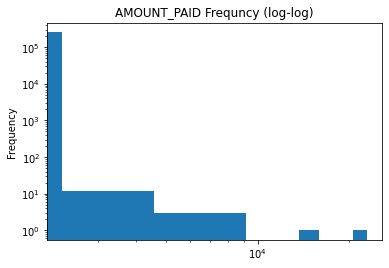

In [68]:
df["AMOUNT_PAID"].plot(kind='hist', loglog=True, title='AMOUNT_PAID Frequncy (log-log)')

Intial costs appear to be distributed roughly exponentially 

<AxesSubplot:title={'center':'AMOUNT_PAID Frequncy, values < 10^8 (log)'}, ylabel='Frequency'>

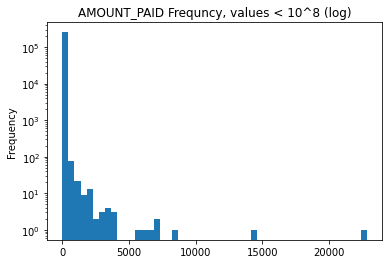

In [69]:
df.loc[df["AMOUNT_PAID"]<10**8]["AMOUNT_PAID"].plot(kind='hist', logy=True, bins=50, title='AMOUNT_PAID Frequncy, values < 10^8 (log)')

Plotting AMOUNT_DUE shows it is also roughly exponential in distribution

<AxesSubplot:title={'center':'AMOUNT_DUE Frequncy (log-log)'}, ylabel='Frequency'>

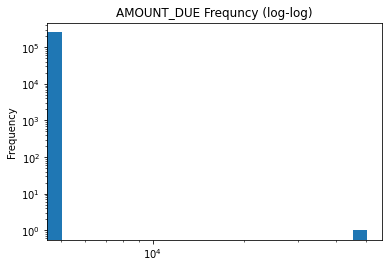

In [70]:
df["AMOUNT_DUE"].plot(kind='hist', loglog=True, title='AMOUNT_DUE Frequncy (log-log)')

<AxesSubplot:title={'center':'AMOUNT_DUE Frequncy, values < 10^7 (log)'}, ylabel='Frequency'>

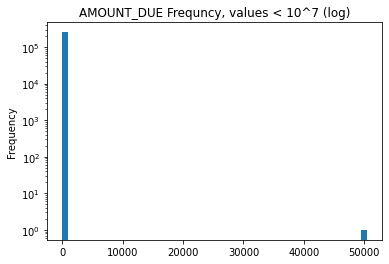

In [71]:
df.loc[df["AMOUNT_DUE"]<10**7]["AMOUNT_DUE"].plot(kind='hist', logy=True, bins=50, title='AMOUNT_DUE Frequncy, values < 10^7 (log)')

Now that we've mapped these to numerical values, we can identifiy additional issues

#### Fixing AMOUNT_PAIDs

In [72]:
# Not possible
df["AMOUNT_PAID"].min()

0.0

In [73]:
# Obviously a fill-in
df["AMOUNT_PAID"].max()

22830.0

In [74]:
df.loc[df['AMOUNT_PAID'] < 0]['AMOUNT_PAID']

Series([], Name: AMOUNT_PAID, dtype: float64)

This is test data:

In [75]:
df.loc[df['AMOUNT_PAID'] == 22830.0]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
146281,M00125021-S1-EL,M00125021,S1,03/12/2019 12:00:00 AM,Subsequent Filing,Cancel,Inspection not complete due to withdrawal,287,PARK AVENUE SOUTH,MANHATTAN,...,22830.0,0.0,Credit Card,40.739685,-73.986720,2,68,1018010,1008780001,Gramercy


We will drop this row

<AxesSubplot:title={'center':'AMOUNT_PAID Frequncy (log)'}, ylabel='Frequency'>

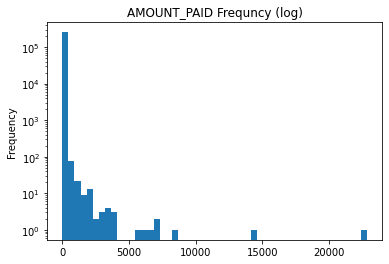

In [76]:
df["AMOUNT_PAID"].plot(kind='hist', logy=True, bins=50, title='AMOUNT_PAID Frequncy (log)')

#### Fixing AMOUNT_DUE

In [77]:
df.loc[df['AMOUNT_DUE'] < 0 ]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME


We'll fix this as we did with negative monetary values before

In [78]:
df.loc[df['AMOUNT_DUE'] == -85.8,  'AMOUNT_DUE'] = 85.8

In [79]:
df['AMOUNT_DUE'].max()

50400.0

Also seems to have real information

In [80]:
df.loc[df['AMOUNT_DUE']==31500000.0]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME


## Checking owner's information

In [81]:
show_vals("BUSINESS_NAME")
show_vals("OWNER_TYPE")
show_vals("OWNER_ADDRESS")
show_vals("OWNER_CITY")
show_vals("OWNER_STATE")
show_vals("OWNER_ZIP")

Top 10 BUSINESS_NAME:

NaN                                108436
PR                                   9807
NYCHA                                1809
EVEREST SCAFFOLDING INC.             1391
NYCSCA                               1257
BPP PARKER TOWER PROPERTY OWNER      1008
SPRING SCAFFOLDING LLC                896
Charter Communications                824
OWNERS REP                            822
PHOENIX SUTTON STR INC                744
Name: BUSINESS_NAME, dtype: int64

Top 10 OWNER_TYPE:

Individual                                      122714
Corporation                                      95577
Partenership                                     16365
NYC Agency                                        7359
NYCHA                                             4831
Condo Unit Owner or Co-Op Tenant-Shareholder      4780
Other Government                                  2962
HHC                                                431
NaN                                                  5
Name: O

## Fixing owner's informations

In [82]:
df.loc[~df["BUSINESS_NAME"].isna() & df["BUSINESS_NAME"].str.contains("(?i)new york city")]["BUSINESS_NAME"].value_counts()

NEW YORK CITY HOUSING AUTHORITY                     628
NEW YORK CITY ECONOMIC DEVELOPMENT                   83
New York City School Construction Authority          25
NEW YORK CITY DEPT. OF ENVIRONMENTA                  22
NEW YORK CITY SCHOOL CONSTRUCTION AUTHORITY          10
New York City Housing Authority                       8
New York City Scool Construction Authority            5
RALPH NEW YORK CITY LLC                               4
NEW YORK CITY DEPARTMENT OF PARKS AND RECREATION      4
NEW YORK CITY MANAGEMENT                              3
TA NEW YORK CITY BA LLC                               3
New York City Center                                  2
New York City Management, LLC.                        2
NEW YORK CITY                                         2
NEW YORK CITY POLICE DEPT                             1
New York City Environmental Protection                1
New York City School Authority                        1
Heritage Hotel New York City                    

Normalizes a couple of duplicate names

In [83]:
df["BUSINESS_NAME"] = df["BUSINESS_NAME"].str.replace("NEW YORK CITY", "NYC")
df["BUSINESS_NAME"] = df["BUSINESS_NAME"].str.upper()
df["BUSINESS_NAME"] = df["BUSINESS_NAME"].str.replace(".", '', regex=False)
df["BUSINESS_NAME"] = df["BUSINESS_NAME"].str.replace(",", '', regex=False)

All these are the same thing. Uses clusters to fix

In [84]:
#may have to use fuzzy/cluster to fix this problem
df.loc[~df["BUSINESS_NAME"].isna() & df["BUSINESS_NAME"].str.contains("(?i)HOUSING AUTHORITY")]["BUSINESS_NAME"].value_counts()

NYC HOUSING AUTHORITY              719
NEW YORK CITY HOUSING AUTHORITY      8
NEW YORK HOUSING AUTHORITY           1
HOUSING AUTHORITY                    1
Name: BUSINESS_NAME, dtype: int64

Used clusters to try to fix the rest of them further below

In [85]:
df["OWNER_STATE"].value_counts()

NY    52
ny     7
Il     4
NJ     2
FL     1
Name: OWNER_STATE, dtype: int64

In [86]:
df["OWNER_STATE"] = df["OWNER_STATE"].str.upper()

Since the states can be outside NYC, these are probably fine

In [87]:
df["OWNER_ZIP"].value_counts()

60606        4
11206        3
11385        3
11219        3
11101        2
11373        2
10036        2
11235        2
11218        2
11230        2
11222        2
10013        2
10025        2
10016        2
10022        2
10018        2
10010        2
11217        2
10007        1
11228        1
11229        1
10021        1
11435        1
11021        1
11743        1
10038        1
11225        1
11238        1
11434        1
11209        1
11210        1
07080        1
10128        1
10065        1
11234        1
11211        1
11355        1
11697        1
12521-555    1
11221        1
33414        1
11249        1
07652        1
Name: OWNER_ZIP, dtype: int64

## Quick look at GIS

In [88]:
show_vals("GIS_LATITUDE")
show_vals("GIS_LONGITUDE")
show_vals("GIS_COUNCIL_DISTRICT")
show_vals("GIS_CENSUS_TRACT")
show_vals("GIS_NTA_NAME")
show_vals("GIS_BIN")

Top 10 GIS_LATITUDE:

40.723485    378
40.723780    359
40.723714    331
NaN          309
40.753992    248
40.750662    160
40.736934    138
40.756667    136
40.751098    132
40.751430    129
Name: GIS_LATITUDE, dtype: int64

Top 10 GIS_LONGITUDE:

-73.848490    378
-73.848991    363
-73.848879    330
NaN           309
-73.999830    254
-73.991944    161
-73.980684    139
-73.984396    135
-73.992926    132
-73.994001    130
Name: GIS_LONGITUDE, dtype: int64

Top 10 GIS_COUNCIL_DISTRICT:

4     21841
3     16440
1     10844
2      9015
6      8845
33     8402
39     6438
5      6376
50     5354
36     5322
Name: GIS_COUNCIL_DISTRICT, dtype: int64

Top 10 GIS_CENSUS_TRACT:

7        1413
33       1404
99       1248
119      1228
137      1173
21       1166
71305    1119
96       1094
104      1075
37       1062
Name: GIS_CENSUS_TRACT, dtype: int64

Top 10 GIS_NTA_NAME:

Midtown-Midtown South                         11698
Hudson Yards-Chelsea-Flatiron-Union Square     7292
Upper East Sid

In [89]:
#Manually looking at some of these
df[["GIS_LATITUDE", "GIS_LONGITUDE", "GIS_COUNCIL_DISTRICT", "GIS_CENSUS_TRACT", "GIS_NTA_NAME", "GIS_BIN"]]

,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,40.590828,-73.962756,48,370,Brighton Beach,3195471
1,40.579607,-73.962071,48,364,Brighton Beach,3244470
2,40.716973,-73.948873,34,501,East Williamsburg,3068248
3,40.677481,-73.992963,39,77,Carroll Gardens-Columbia Street-Red Hook,3007911
4,40.701158,-73.949433,33,507,Bedford,3000000
...,...,...,...,...,...,...
255019,40.869531,-73.847275,12,350,Allerton-Pelham Gardens,2055363
255020,40.864804,-73.890606,15,40502,Bedford Park-Fordham North,2016643
255021,40.894850,-73.846732,12,428,Woodlawn-Wakefield,2068841
255022,40.819668,-73.820422,13,132,Schuylerville-Throgs Neck-Edgewater Park,2080582


In [90]:
#shouldn't be 0
df["GIS_LATITUDE"] = df["GIS_LATITUDE"].astype('float')
df["GIS_LATITUDE"].min()

40.499059

In [91]:
df["GIS_LATITUDE"].max()

40.912869

In [92]:
df.loc[df["GIS_LATITUDE"] == 0.0]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME


#### Removed the the rows above because its obviously a filler job

In [93]:
df = df.drop(df[df["GIS_LATITUDE"] == 0.0].index)

In [94]:
df["GIS_LATITUDE"].min()

40.499059

#### The min and max makes sense as the values range from Staten Island to the Bronx

In [95]:
df["GIS_LONGITUDE"] = df["GIS_LONGITUDE"].astype('float')
df["GIS_LONGITUDE"].min()

-74.254845

In [96]:
df["GIS_LONGITUDE"].max()

-73.700369

In [97]:
df.loc[df["GIS_LONGITUDE"] == -74.254845]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
51624,S00602609-I1-EL,S00602609,I1,09/29/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,10,AVIVA COURT,STATEN ISLAND,...,40.0,0.0,Credit Card,40.508064,-74.254845,51,248,5000000,5080050220,Charleston-Richmond Valley-Tottenville
71415,S00637151-I1-EL,S00637151,I1,11/24/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,10,AVIVA COURT,STATEN ISLAND,...,40.0,0.0,Credit Card,40.508064,-74.254845,51,248,5000000,5080050220,Charleston-Richmond Valley-Tottenville


#### These longitudes and latitudes range from Queens to Staten Island which is also consistent with our dataset

In [98]:
df["GIS_COUNCIL_DISTRICT"] = df["GIS_COUNCIL_DISTRICT"].astype('float')
df["GIS_COUNCIL_DISTRICT"].min()

1.0

In [99]:
df["GIS_COUNCIL_DISTRICT"].max()

51.0

#### 1-51 are all valid districts

In [100]:
df["GIS_CENSUS_TRACT"] = df["GIS_CENSUS_TRACT"].astype('float')
df["GIS_CENSUS_TRACT"].min()

1.0

In [101]:
df["GIS_CENSUS_TRACT"].max()

157903.0

In [102]:
df.loc[df["GIS_CENSUS_TRACT"] == 157903]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
4922,Q00549701-I1-EL,Q00549701,I1,06/30/2021 12:00:00 AM,New Job Filing,Complete,Job is complete,8632,259 STREET,QUEENS,...,40.0,0.0,Credit Card,40.732623,-73.707557,23.0,157903.0,4180477,4088170055,Glen Oaks-Floral Park-New Hyde Park
6659,Q00599712-I1-EL,Q00599712,I1,09/23/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,8528,256 STREET,QUEENS,...,40.0,0.0,Check,40.733735,-73.710893,23.0,157903.0,4180020,4087980024,Glen Oaks-Floral Park-New Hyde Park
6874,Q00292734-S1-EL,Q00292734,S1,09/16/2020 12:00:00 AM,Subsequent Filing,Complete,Job is complete,86-15,259 STREET,QUEENS,...,40.0,0.0,Check,40.732856,-73.707621,23.0,157903.0,4180493,4088180028,Glen Oaks-Floral Park-New Hyde Park
8229,Q00004024-I1-EL,Q00004024,I1,12/27/2017 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,261-07,87 AVENUE,QUEENS,...,40.0,0.0,Check,40.731923,-73.705265,23.0,157903.0,4617945,4088200004,Glen Oaks-Floral Park-New Hyde Park
16019,Q00527491-I1-EL,Q00527491,I1,05/24/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,267-06,HILLSIDE AVENUE,QUEENS,...,40.0,0.0,Check,40.738726,-73.701789,23.0,157903.0,4180007,4087970001,Glen Oaks-Floral Park-New Hyde Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225376,Q00487089-I1-EL,Q00487089,I1,03/16/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,85-15,258 STREET,QUEENS,...,40.0,0.0,Check,40.734318,-73.709137,23.0,157903.0,4180083,4088010014,Glen Oaks-Floral Park-New Hyde Park
225381,Q00487234-I1-EL,Q00487234,I1,03/16/2021 12:00:00 AM,New Job Filing,Complete,Job is complete,84-30,264 STREET,QUEENS,...,40.0,0.0,Credit Card,40.737358,-73.704364,23.0,157903.0,4179972,4087930033,Glen Oaks-Floral Park-New Hyde Park
225383,Q00487175-I1-EL,Q00487175,I1,03/16/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,255-15,EAST WILLISTON AVENUE,QUEENS,...,40.0,0.0,Check,40.733676,-73.711752,23.0,157903.0,4179715,4087850029,Glen Oaks-Floral Park-New Hyde Park
225610,Q00491605-I1-EL,Q00491605,I1,03/23/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,257-04,87 AVENUE,QUEENS,...,40.0,0.0,Check,40.731168,-73.708772,23.0,157903.0,4180622,4088250032,Glen Oaks-Floral Park-New Hyde Park


#### No irregulars for census tract

In [103]:
df["GIS_BIN"] = df["GIS_BIN"].astype('float')
df["GIS_BIN"].min()

1000000.0

In [104]:
df["GIS_BIN"] = df["GIS_BIN"].astype('float')
df["GIS_BIN"].max()

5174629.0

In [105]:
df.loc[df["GIS_BIN"] == 1000000]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
141,M00378674-P1,M00378674,P1,06/02/2021 12:00:00 AM,PAA,Approved,Job in Process,267,WEST 126 STREET,MANHATTAN,...,40.0,0.0,NaN,40.810409,-73.949628,9.0,224.0,1000000.0,1019320005,Central Harlem North-Polo Grounds
261,M00532602-I1-EL,M00532602,I1,06/02/2021 12:00:00 AM,New Job Filing,Cancel,Inspection not complete due to withdrawal,2017,FIRST AVENUE,MANHATTAN,...,40.0,0.0,Credit Card,40.788231,-73.941094,8.0,164.0,1000000.0,1016750030,East Harlem South
695,M00051754-I1-EL,M00051754,I1,06/09/2018 12:00:00 AM,New Job Filing,Complete,Job is complete,110,CHARLTON STREET,MANHATTAN,...,40.0,0.0,Check,40.727422,-74.008392,3.0,37.0,1000000.0,1005970039,SoHo-TriBeCa-Civic Center-Little Italy
698,M00051870-I1-EL,M00051870,I1,06/11/2018 12:00:00 AM,New Job Filing,Complete,Job is complete,315,EAST 46 STREET,MANHATTAN,...,40.0,0.0,Check,40.752140,-73.969758,4.0,90.0,1000000.0,1013390010,Turtle Bay-East Midtown
715,M00546819-I1-EL,M00546819,I1,06/29/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,501,WEST 35 STREET,MANHATTAN,...,40.0,0.0,Credit Card,40.755342,-73.998849,3.0,99.0,1000000.0,1007070031,Hudson Yards-Chelsea-Flatiron-Union Square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183971,M00504131-I1-EL,M00504131,I1,04/15/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,115,EAST 97 STREET,MANHATTAN,...,40.0,0.0,Credit Card,40.786874,-73.951206,5.0,15802.0,1000000.0,1016250007,East Harlem South
183976,M00504103-I1-EL,M00504103,I1,04/15/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,115,EAST 97 STREET,MANHATTAN,...,40.0,0.0,Credit Card,40.786874,-73.951206,5.0,15802.0,1000000.0,1016250007,East Harlem South
184074,M00505874-I1-EL,M00505874,I1,04/19/2021 12:00:00 AM,New Job Filing,Complete,Job is complete,25,GREAT JONES STREET,MANHATTAN,...,40.0,0.0,Check,40.727043,-73.993152,1.0,5502.0,1000000.0,1005307508,West Village
184193,M00507415-I1-EL,M00507415,I1,04/20/2021 12:00:00 AM,New Job Filing,Permit Issued,Job in Process,469,CONVENT AVENUE,MANHATTAN,...,40.0,0.0,Credit Card,40.828014,-73.943581,9.0,23501.0,1000000.0,1020650019,Hamilton Heights


In [106]:
df.loc[df["GIS_BIN"] == 5174629.0]

,JOB_FILING_NUMBER,JOB_NUMBER,FILING_NUMBER,FILING_DATE,FILING_TYPE,FILING_STATUS,JOB_STATUS,HOUSE_NUMBER,STREET_NAME,BOROUGH,...,AMOUNT_PAID,AMOUNT_DUE,PAYMENT_METHOD,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_BIN,GIS_BBL,GIS_NTA_NAME
231578,S00161271-I1-EL,S00161271,I1,04/30/2019 12:00:00 AM,New Job Filing,Complete,Job is complete,67,CEDAR GROVE AVENUE,STATEN ISLAND,...,40.0,0.0,Credit Card,40.56283,-74.099129,50.0,12804.0,5174629.0,5040830001,New Dorp-Midland Beach


#### Nothing wrong with GIS BIN either

# Data Profilling for datetime columns


Find format problems and outliers in all datetime columns

Using openclean's sklearn modules to detect problems and outliers

In [107]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

def findDateOutliers(column_name, eps_setting = 0.05):
    datetime_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(datetime_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(datetime_data)))
    print(DBSCANOutliers().find(datetime_data))
    print(DBSCANOutliers(eps = eps_setting).find(datetime_data))
    print('\n==================================')

In [108]:
date_cols = []

print("Datetime Data columns:\n")
for col in ds.columns:
    if 'Date' in col or 'DATE' in col:
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.02)

Datetime Data columns:

FILING_DATE
GENERAL_LIABILITY_EXPIRATION_DATE
WORKER_COMP_EXPIRATION_DATE
DISABILITY_EXPIRATION_DATE
PERMIT_ISSUED_DATE
JOB_START_DATE
COMPLETION_DATE
----------------------------

Column:  FILING_DATE
1.  05/12/2021 12:00:00 AM         530
2.  12/06/2019 12:00:00 AM         396
3.  02/21/2020 12:00:00 AM         390
4.  02/05/2020 12:00:00 AM         381
5.  02/04/2020 12:00:00 AM         379
6.  10/01/2020 12:00:00 AM         377
7.  12/11/2019 12:00:00 AM         376
8.  08/12/2020 12:00:00 AM         372
9.  07/09/2018 12:00:00 AM         367
10. 11/13/2019 12:00:00 AM         366

Total number of distinct values in FILING_DATE is 1453
[]
['07/09/2018 12:00:00 AM', '10/11/2021 12:00:00 AM', '11/20/2021 12:00:00 AM', '11/13/2019 12:00:00 AM', '02/02/2021 12:00:00 AM', '05/15/2019 12:00:00 AM', '01/01/2021 12:00:00 AM', '02/11/2020 12:00:00 AM', '03/19/2018 12:00:00 AM', '05/12/2021 12:00:00 AM', '02/20/2020 12:00:00 AM', '08/25/2019 12:00:00 AM', '12/06/2019 

# Remember that after changing some of the column names, there are some columns that are also datetime data:

"Paid": "Paid Date"\
"Fully Paid": "Fully Paid Date"\
"Assigned": "Assigned Date"\
"Approved": "Approved Date"\
"Pre- Filing Date": "Pre-Filing Date"\
"DOBRunDate": "DOB Run Date"\
"SIGNOFF_DATE": "Signoff Date"\
"SPECIAL_ACTION_DATE": "Special Action Date"\

In [109]:
date_cols = ["FILING_DATE","GENERAL_LIABILITY_EXPIRATION_DATE","WORKER_COMP_EXPIRATION_DATE","DISABILITY_EXPIRATION_DATE", "PERMIT_ISSUED_DATE", "JOB_START_DATE", "COMPLETION_DATE"]

for col in date_cols:
    findDateOutliers(col, 0.02)

Column:  FILING_DATE
1.  05/12/2021 12:00:00 AM         530
2.  12/06/2019 12:00:00 AM         396
3.  02/21/2020 12:00:00 AM         390
4.  02/05/2020 12:00:00 AM         381
5.  02/04/2020 12:00:00 AM         379
6.  10/01/2020 12:00:00 AM         377
7.  12/11/2019 12:00:00 AM         376
8.  08/12/2020 12:00:00 AM         372
9.  07/09/2018 12:00:00 AM         367
10. 11/13/2019 12:00:00 AM         366

Total number of distinct values in FILING_DATE is 1453
[]
['07/09/2018 12:00:00 AM', '10/11/2021 12:00:00 AM', '11/20/2021 12:00:00 AM', '11/13/2019 12:00:00 AM', '02/02/2021 12:00:00 AM', '05/15/2019 12:00:00 AM', '01/01/2021 12:00:00 AM', '02/11/2020 12:00:00 AM', '03/19/2018 12:00:00 AM', '05/12/2021 12:00:00 AM', '02/20/2020 12:00:00 AM', '08/25/2019 12:00:00 AM', '12/06/2019 12:00:00 AM', '07/05/2019 12:00:00 AM', '12/11/2019 12:00:00 AM', '02/21/2020 12:00:00 AM', '02/05/2020 12:00:00 AM', '06/28/2019 12:00:00 AM', '09/14/2018 12:00:00 AM', '02/26/2021 12:00:00 AM', '06/07/20

# Data Cleaning for outliers in datetime columns

In [110]:
# new_df = df

# Reload the data, only for test
# new_df = pd.read_csv(datafile, dtype='object', sep='\t')

## Fixing Datetime columns format

In [111]:
datetime_column_list = ["FILING_DATE","GENERAL_LIABILITY_EXPIRATION_DATE","WORKER_COMP_EXPIRATION_DATE","DISABILITY_EXPIRATION_DATE", "PERMIT_ISSUED_DATE", "JOB_START_DATE", "COMPLETION_DATE"]
for col in datetime_column_list:
    show_vals(col)

Top 10 FILING_DATE:

05/12/2021 12:00:00 AM    530
12/06/2019 12:00:00 AM    396
02/21/2020 12:00:00 AM    390
02/05/2020 12:00:00 AM    381
02/04/2020 12:00:00 AM    379
10/01/2020 12:00:00 AM    377
12/11/2019 12:00:00 AM    376
08/12/2020 12:00:00 AM    372
07/09/2018 12:00:00 AM    367
11/13/2019 12:00:00 AM    366
Name: FILING_DATE, dtype: int64

Top 10 GENERAL_LIABILITY_EXPIRATION_DATE:

10/19/2022 12:00:00 AM    5429
10/01/2022 12:00:00 AM    2755
04/03/2022 12:00:00 AM    2599
07/12/2022 12:00:00 AM    2510
09/01/2022 12:00:00 AM    2462
12/12/2021 12:00:00 AM    2172
08/11/2022 12:00:00 AM    2115
05/12/2022 12:00:00 AM    1969
01/01/2022 12:00:00 AM    1909
10/01/2021 12:00:00 AM    1853
Name: GENERAL_LIABILITY_EXPIRATION_DATE, dtype: int64

Top 10 WORKER_COMP_EXPIRATION_DATE:

11/01/2022 12:00:00 AM    12016
11/01/2021 12:00:00 AM     7342
12/22/2021 12:00:00 AM     5882
10/31/2020 12:00:00 AM     5548
04/01/2022 12:00:00 AM     5119
10/31/2019 12:00:00 AM     4283
06/01/202

Check to see if any columns have values in year-month-day format

This mapped most of our values to datetimes, now just need to map the rest

In [112]:
for col in date_cols:
    print(col)
    df.loc[:,col] = pd.to_datetime(df[col])

FILING_DATE
GENERAL_LIABILITY_EXPIRATION_DATE
WORKER_COMP_EXPIRATION_DATE
DISABILITY_EXPIRATION_DATE
PERMIT_ISSUED_DATE
JOB_START_DATE
COMPLETION_DATE


In [113]:
df.select_dtypes(include='datetime')

,FILING_DATE,GENERAL_LIABILITY_EXPIRATION_DATE,WORKER_COMP_EXPIRATION_DATE,DISABILITY_EXPIRATION_DATE,PERMIT_ISSUED_DATE,JOB_START_DATE,COMPLETION_DATE
0,2021-06-02,2022-05-06,2021-12-20,2021-12-20,NaT,2018-10-02,2018-11-24
1,2021-04-27,2022-01-21,2022-04-13,2022-04-13,NaT,2019-03-19,2020-07-03
2,2021-06-02,2021-10-20,2021-10-22,2021-10-21,NaT,2019-11-10,2020-11-10
3,2021-06-02,2022-03-18,2021-06-14,2021-10-29,NaT,2020-01-27,2020-12-01
4,2021-06-02,2021-12-09,2021-07-01,2021-12-31,NaT,2021-06-02,2023-06-02
...,...,...,...,...,...,...,...
255019,2021-04-23,2022-08-02,2022-05-23,2022-06-20,2021-04-23,2021-04-23,2022-11-23
255020,2021-04-24,2022-05-20,2022-02-28,2022-02-28,2021-04-24,2021-04-24,2022-04-23
255021,2021-04-25,2021-11-15,2022-04-01,2021-11-01,2021-04-25,2021-04-25,2022-04-25
255022,2021-04-25,2022-03-23,2022-06-07,2022-04-14,2021-04-25,2021-04-25,2021-10-25


# Data Profilling for City and Other Description

Find format problems and outliers in City and Description columns

Using openclean's sklearn modules to detect problems and outliers

In [114]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [115]:
date_cols = ["CITY"]

In [116]:
date_cols = ["CITY"]
print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

----------------------------

Column:  CITY
1.  BROOKLYN      79,976
2.  NEW YORK      29,356
3.  STATEN ISLAND      28,221
4.     BRONX      23,094
5.  LONG ISLAND CITY      17,603
6.  FLUSHING      11,655
7.   ASTORIA       8,750
8.  WOODSIDE       7,379
9.   JAMAICA       4,806
10.  MASPETH       4,063

Total number of distinct values in CITY is 77
['', 'NEW YORK', 'S. RICHMOND HILL', 'SPRINGFIELD GARDENS', 'STATEN ISLAND', 'NEW YORIK', 'ELMHURST', 'BROOKLYN', 'BRONX', 'MASPETH', 'FLUSHING', 'L.I.C.', 'BELLEHARBOR', 'REGO PARK', 'BAYSIDE', 'S.I.', 'QUEENS.VILLAGE', 'OZONE PK', 'SUITE 2A', 'RICHMOND.HILL', 'LONG ISLAND CITY', 'FRESH MEADOWS LANE', 'LIC', 'BRONX,', 'NY', 'ST. ALBANS', 'S. RICHMOND', 'SOUTH RICHMOND HILL', 'L.I.C', 'COLLEGE PT.', 'MANHATTAN', 'NEW HYDE PARK']



# Analysis

the above results show the problems for the data cleaning task:
    
### For City

There are many misspellings and abbreviations for city names. We can use both clustering and Soundex to detect misspellings and abbreviations. And we can check if our cleaning is right by refer to the U.S. Cities reference datasets in openclean.



In [117]:
from openclean.function.eval.base import Col, Eval
from openclean.function.eval.logic import And
from openclean.function.value.phonetic import Soundex, soundex

In [118]:
upper = ds\
    .select('CITY')\
    .update('CITY', str.upper)

In [119]:
from openclean.data.refdata import RefStore

refdata = RefStore()
city_df = refdata\
    .load('encyclopaedia_britannica:us_cities', auto_download=True)\
    .df()


In [120]:
city_list = city_df['city']
print(city_list)

0          Demopolis
1          Sylacauga
2               Troy
3             Dothan
4           Prichard
            ...     
1956          Powell
1957        Riverton
1958        Sheridan
1959    Rock Springs
1960         Buffalo
Name: city, Length: 1961, dtype: object


# An example of using soundex in openclean

However, using soundex for each of the city is too slow, the code below take nearly 4 mins for one sningle city.\
So we should use clustering first and then use hard code to clean the remianing city name that is not in the city_list.

In [121]:
brooklyn = ds\
    .select('CITY')\
    .update('CITY', str.upper)\
    .filter(And(Eval('CITY', Soundex()) == soundex('BROOKLYN'), Col('CITY') != 'BROOKLYN'))\
    .distinct()

print('RANK\tCOUNT\tNAME')
for i, entry in enumerate(brooklyn.most_common()):
    key, count = entry
    print('{}.\t{}\t{}'.format(i + 1, count, key))

RANK	COUNT	NAME


# Data Cleaning for Applicant columns

* how to deal with empty values has not decided yet

# Transform all city names to upper case

### Remember that we have changed some column names:
"City ": "OWNER_CITY"\
"State": "OWNER_STATE"

In [122]:
df['OWNER_CITY'] = df['OWNER_CITY'].str.upper()

# Convert similar values to suggested value using kNN clustering

In [123]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2, preds = 0.5):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(preds)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i <5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
    
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [124]:
date_cols = ['OWNER_CITY']


print("kNN cluster for ", 'OWNER_CITY')
col_clusters = getClusters("CITY")
print("updating column ", 'OWNER_CITY')
print("----------------------\nTop 5 Cluster:\n----------------------")
updateUsingClusters('OWNER_CITY', col_clusters, True)
print("================")

kNN cluster for  OWNER_CITY
updating column  OWNER_CITY
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 7)

RICHMOND HILL (2845)
RICHMOND.HILL (44)
S. RICHMOND HILL (115)
S. RICHMOND (89)
S.RICHMOND HILL (68)
RICHMOND HILLS (10)
SOUTH RICHMOND HILL (497)

Suggested value: RICHMOND HILL


Cluster 1 (of size 6)

RICHMOND.HILL (44)
SOUTH RICHMOND HILL (497)
S. RICHMOND HILL (115)
S.RICHMOND HILL (68)
RICHMOND HILLS (10)
RICHMOND HILL (2845)

Suggested value: RICHMOND HILL


Cluster 2 (of size 5)

COLLEGE POIT (6)
COLLEGE PT. (34)
COLLEGE PT (60)
BREEZY POINT (115)
COLLEGE POINT (2555)

Suggested value: COLLEGE POINT


Cluster 3 (of size 4)

SOUTH RICHMOND HILL (497)
S. RICHMOND HILL (115)
S.RICHMOND HILL (68)
S. RICHMOND (89)

Suggested value: SOUTH RICHMOND HILL


Cluster 4 (of size 4)

SOUTH OZONE PARK (557)
SOUT OZONE PARK (49)
OZONE PK (75)
OZONE PARK (3859)

Suggested value: OZONE PARK




# After clustering, find data that is not in the reference city dataset, hard code to clean them

In [125]:
upper_city_list = []
for item in city_list:
    upper_city_list.append(str(item.upper()))

outlier_cities = df.loc[(~df['OWNER_CITY'].str.upper().isin(upper_city_list)) & (~df['OWNER_CITY'].isna())]['OWNER_CITY'].drop_duplicates()
print(outlier_cities)

5686             NEW YORK
10881          WELLINGTON
27369                 LIC
27396                 NYC
27399    SOUTH PLAINFIELD
27403             JAMAICA
27420                  NY
72461        EAST PARAMUS
Name: OWNER_CITY, dtype: object


# Print standardized cities and found outliers

In [126]:
standardized_cities = df.loc[(df['OWNER_CITY'].str.upper().isin(upper_city_list)) & (~df['OWNER_CITY'].isna())]['OWNER_CITY'].drop_duplicates()
print(standardized_cities)

957        BROOKLYN
25254        QUEENS
25995       CHICAGO
27366     RIDGEWOOD
27374      FLUSHING
27386      ELMHURST
27421    GREAT NECK
27436    HUNTINGTON
Name: OWNER_CITY, dtype: object


In [127]:
outlier_city_list = []
for item in outlier_cities:
    outlier_city_list.append(str(item))
    
print(outlier_city_list)

['NEW YORK', 'WELLINGTON', 'LIC', 'NYC', 'SOUTH PLAINFIELD', 'JAMAICA', 'NY', 'EAST PARAMUS']


# Search for similar city names in reference city dataset, and hard code to replace those outliers

In [128]:
def findCityName(str):
    print(city_df['city'].loc[city_df['city'].str.contains(str)].drop_duplicates())
    print("------------------------\n")
    
findCityName("Rich")
findCityName("Island")
findCityName("White")
findCityName("Philadelphia")
findCityName("Morris")
findCityName("Nassau")
findCityName("Westchester")
  

137       Richmond
1728    Richardson
1860      Richland
Name: city, dtype: object
------------------------

498       Rock Island
1060     Grand Island
1286    Staten Island
1294     Coney Island
Name: city, dtype: object
------------------------

363             White Springs
1266             White Plains
1881    White Sulphur Springs
Name: city, dtype: object
------------------------

997         Philadelphia
1418    New Philadelphia
Name: city, dtype: object
------------------------

1151    Morristown
Name: city, dtype: object
------------------------

Series([], Name: city, dtype: object)
------------------------

Series([], Name: city, dtype: object)
------------------------



In [129]:
outlier_city_list = ['NEW YORK', 'BKLYN', 'ROOKLYN', 'RICHMOND HILL', 'BX', 'NY', 'OLD WESTBURY', 'N.Y.', 'HOLLIS', 'MAHATTAN', 'LAKE SUCCESS', 'BROKKLYN', 'BETHESDA', 'JAMAICA', 'SECAUCUS', 'LIC', 'MASPETH', 'JAMAICA ESTATES', 'SOUTH OZONE PAR', 'BAYSIDE', 'JAM', 'PARMUS', 'KEW GARDENS', 'WOONSECKET', 'LI', 'ST. ALBANS', 'MASSAPEQUA', 'SI', 'FLORAL PARK', 'ROSLYN HEIGHTS', 'HOWARD BEACH', 'WHITEPLAINS', 'JACKSON HEIGHTS', 'REGO PARK', 'NEW HYDE PARK', 'REGO', 'ARVERNE', 'OZONE PARK', 'VALLEY STREAM', 'NEPONSIT', 'ROCKVILLE CENTR', 'BRIARWOOD', 'BRKLYN', 'MOUNT LAUREL', 'QUEEEN', 'ELMSFORD', 'NYC', 'GILLFORD', 'PARSIPPANY', 'WOODSIDE', 'LONG ISLAND CIT', 'QUEEN', 'VAALLEY STREAAM', 'BRONS', 'COLLEGE POINT', 'ROCKAWAY POINT', 'DOUGLASTON', 'ENGLEWOOD CLIFF', 'QNS', 'LYNBROOK', 'SYOSSET', 'FRESH MEADOWS', 'LITTLE NECK', 'WOODHAVEN', 'HARTSDALE', 'ATLANTIC BEACH', 'SAN JUAN CAPIST', 'CALDE PLACE', 'RIVERDALE', 'TUCKAHOE', 'SEAFORD', 'L.I.C.', 'REGO PK', "B'KLYN"]
clean_city_list = ['NEW YORK CITY', 'BROOKLYN', 'BROOKLYN', 'RICHMOND', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'MANHATTAN', 'NEW YORK CITY', 'BROOKLYN', 'BETHESDA', 'NEW YORK CITY', 'SECAUCUS', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'PARAMUS', 'NEW YORK CITY', 'WOONSOCKET', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'STATEN ISLAND', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'WHITE PLAINS', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'BROOKLYN', 'PHILADELPHIA', 'QUEEENS', 'NEW YORK CITY', 'NEW YORK CITY', 'GILLFORD', 'MORRIS', 'NEW YORK CITY', 'LONG ISLAND CITY', 'QUEENS', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'QUEENS', 'NEW YORK CITY', 'NASSAU', 'QUEENS', 'QUEENS', 'WOODHAVEN', 'NEW YORK CITY', 'NASSAU', 'SAN JUAN CAPISTRANO', 'BROOKLYN', 'RIVERDALE', 'STATEN ISLAND', 'NASSAU', 'LONG ISLAND CITY', 'QUEENS', "BROOKLYN"]

df['OWNER_CITY'] = df['OWNER_CITY'].replace(outlier_city_list, clean_city_list)

# Check State Column

In [130]:
state_col = 'STATE'
findDateOutliers(state_col, 0.1)

Column:  STATE
1.        NY     255,011
2.                     8
3.  WOODHAVEN           5

Total number of distinct values in STATE is 3
['', 'WOODHAVEN', 'NY']



In [131]:
ds.select('STATE').distinct()

Counter({'NY': 255011, '': 8, 'WOODHAVEN': 5})

# Find functional dependencies violations on City -> State

In [132]:
from openclean.operator.collector.count import distinct
from openclean.operator.map.violations import fd_violations

groups = fd_violations(df, lhs='OWNER_CITY', rhs='OWNER_STATE')

print('City         \t|            State')
print('=============\t|  ===============')
for key in groups:
    conflicts = distinct(groups.get(key), 'OWNER_STATE').most_common()
    state, count = conflicts[0]
    print('{:<12} \t| {} x {}'.format(key, count, state))
    for state, count in conflicts[1:]:
        print('             \t| {} x {}'.format(count, state))
    print('-------------\t|  ---------------')

City         	|            State
=============	|  ===============


There is a row that has "NEW YORK CITY" as city, but have "NJ" as State, fix its state to "NY"

In [133]:
df['OWNER_STATE'].loc[(df['OWNER_CITY'] == "NEW YORK CITY") & (df['OWNER_STATE'] == "NJ")]

Series([], Name: OWNER_STATE, dtype: object)

# Apply similar operation on BUSINESS_NAME

In [134]:
bn_col = "BUSINESS_NAME"
findDateOutliers(bn_col)

Column:  BUSINESS_NAME
1.               100,441
2.        PR       9,807
3.       N/A       6,210
4.     NYCHA       1,809
5.  EVEREST SCAFFOLDING INC.       1,391
6.       n/a       1,266
7.    NYCSCA       1,257
8.  BPP PARKER TOWER PROPERTY OWNER       1,008
9.  SPRING SCAFFOLDING LLC         896
10. Charter Communications         824

Total number of distinct values in BUSINESS_NAME is 40981
['', '1266llc', '500-512 seventh avenue, L.P.', 'TL & T LLC', '1417-1419 REALTY ASSOCIATES LLC', 'Riverside 5', '311 COSTER STREETASSOCIATESLLC.', 'LSS, LLC', '304-310 W. 14 REALTY LLC', 'M. MELNICK & CO., INC.', '149 B AND D CORP.', '1190 156th LLC', 'Alans Re 99 Cents & Up Inc', '34th Street Partnership/ Bryant Park Corporation', '582-92 W 207 LLC', 'AT&T', '111 MOTT LLC', '3801-05  LLC', '88-06 Llc', 'FPNY 14TH, LLC, C/O PIZZAROTTI, LLC', '23 RP Associates c/o Adams & Company RE, LLC', '4115 50TH LLC', '150 E 58 ST', '380 2ND', 'Willoughby Rehabilitation and Healthcare Center DBA Spring Cree

# Using clustering for Business Name takes too much time, we can only clean those empty data for now 

In [135]:
df[bn_col] = df[bn_col].replace(['N/A', '', 'NA','NONE'], [None,None,None,None])

# Data Profilling for applicant columns

Find format problems and outliers in all applicant columns

Using openclean's sklearn modules to detect problems and outliers

In [136]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [137]:
date_cols = []

print("Applicant Data columns:\n")
for col in ds.columns:
    if 'APPLICANT' in col:
        print(col)
        date_cols.append(col)

Applicant Data columns:

APPLICANT_FIRST_NAME
APPLICANT_LAST_NAME


In [138]:
date_cols = []

print("Applicant Data columns:\n")
for col in ds.columns:
    if 'APPLICANT' in col:
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

Applicant Data columns:

APPLICANT_FIRST_NAME
APPLICANT_LAST_NAME
----------------------------

Column:  APPLICANT_FIRST_NAME
1.   RICHARD       9,018
2.    STEVEN       8,790
3.    JOSEPH       8,607
4.   MICHAEL       7,530
5.   ANTHONY       5,962
6.    ROBERT       5,367
7.      JOHN       4,956
8.      SAMY       4,828
9.    CARLOS       4,748
10.    JASON       4,624

Total number of distinct values in APPLICANT_FIRST_NAME is 756
['', 'SEEBINDRANATH', 'MICHAEL', 'VASILIOS,BILLY', 'CHRISTOPHER', 'JONG HYUN', 'VAN PAUL', 'PETER', 'MATROS AUTOMATED ELE', 'KWOK WAH', 'MIKHAIL', 'CHAU-PHU', 'KENNETH, SR', 'ALL POWER ELECT.', 'ANATOLIY FINKEL', 'ANTHONY', 'CARLOS A.', 'J ROBERT', 'CARLOS J.', 'J. ROBERT', 'AI FANG', '003692', 'RUI JUN', 'JOSEPH', 'CHARLES DAMBROSE', 'JIAN YANG', 'DAVID', 'JEAN PAUL', 'JEFFREY', 'WILLIAM', 'DAVID MICHAEL', 'STEVEN', 'JUAN CARLOS', 'JOHN F.', 'GEORGE', 'ROBERT', 'GREGORY', 'KENNETH, JR.', 'WEN BIN', 'VINCENT COSCIA', 'RICHARD']

Column:  APPLICANT_LAST_N

# Analysis

the above results show the problems for the data cleaning task:
    
### For name data

in "Applicant's First Name", "Applicant's Last Name", "Applicant Professional Title", there are many outliers which are illegal input, and there are many similar values. We need first converts evident outliers to legal values, then use kNN clusterer to standardize similar values.


### Applicant License #

Applicant License # is made of 6 digits, there are outliers that do not satisfy the 6-digit format. We can not use kNN clusterer to standardize because many License # are similar. 

# Data Cleaning for Applicant columns

* how to deal with empty values has not decided yet

In [139]:
# mapping list to replace outliers
outlier1 = ['', 'MR. ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM 11', 'JOSEP;H``', 'DAID/11/2007', 'CHUNG   LUN', '718 9215010', 'ANTHONY', 'HSIA0-NAN', 'JOSEPH', '``````````', 'ROBERT  `', 'RAJENDRA9956700', '2', 'G.B.M.', 'EUGENE......JR', '6312100', 'CLAUDE,JR.', 'THOMAS``', 'ALAN  L', 'Nab53', 'MR. Y. B', 'J.J', 'PH8ILIP', 'I. M', 'RICHARD', 'ALBERTA S 111 D', 'P ;', 'GENECG.C. ENG &', 'J.J.', '2126202794', 'SHAW  HWA', 'HARRY         H', 'MR DOU8GLAS', '`1D', 'PAUL', 'K. T.', 'JOHN', '...NORMAN', 'EVAN   D', '7184361278BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MAD/Y/ARNI', 'ES ON SCH B', 'EUGENE.......JR', 'NEAL', 'F._ERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0-TECH', 'RODNEY   __', 'DAVID', 'G. L.', 'JAMES', 'LESLI8E', '7186054055', 'GEORGE', 'G.B.M', 'DAVID    JON', 'CHUNG---YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', '1P', 'JUDE.....N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD/HON-AN', 'GLEN  A.L.', 'J.B. Jr.', 'LORENZO..A', 'J J', '..RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY 2', '...JOSEPH', 'RUSSELL 111', 'THOMAS', 'H./E./CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', '--young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']
mapping1 = [None, 'ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM', 'JOSEPH', None, 'CHUNG LUN', None, 'ANTHONY', 'HSIA0 NAN', 'JOSEPH', None, 'ROBERT', 'RAJENDRA', None, 'G.B.M.', 'EUGENEJR', None, 'CLAUDE JR.', 'THOMAS', 'ALAN  L', 'Nab', 'MR. Y. B', 'J.J', 'PHILIP', 'I. M', 'RICHARD', 'ALBERTA', None, 'GENECG.C. ENG', 'J.J.', None, 'SHAW HWA', 'HARRYH', 'MR DOUGLAS', None, 'PAUL', 'K. T.', 'JOHN', 'NORMAN', 'EVAND', 'BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MADYARNI', 'ES ON SCH B', 'EUGENEJR', 'NEAL', 'FERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0 TECH', 'RODNEY', 'DAVID', 'G. L.', 'JAMES', 'LESLIE', None, 'GEORGE', 'G.B.M', 'DAVID JON', 'CHUNG YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', None, 'JUDE N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD HON-AN', 'GLEN A.L.', 'J.B. Jr.', 'LORENZOA', 'J J', 'RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY', 'JOSEPH', 'RUSSELL', 'THOMAS', 'H.E.CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', 'young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']

outlier2 = ['SHARMA #0', "0'CONNOR", 'RUSHTON    UEL', 'UDDIN   Z', 'HINKLEY 1', 'O&#039;CONNOR, P.E.', '.OOK', 'SAMUELS111', 'O&#039;CONNOR', 'CALIENDO', 'SMITH   JR.', 'LO  BUE', '7AN', '+-+ETTIERI', 'SMITH, 111', 'KAMEN   1', '.EE', 'MASS, 1', '.EI', 'Zagaroli 3rd', 'RINI   II', 'KAMEN   R', 'RYAN 11', 'SPI8EZIA L S', 'MUFTIC..A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL, P.E.', 'HAMA07', 'HINLEY,1', '1212', "O  ' CONNELL", 'HURT,JR.,', 'WESOLOWSKI', 'CHEN', '`ING, R.A', 'MARTARELLA 111', 'Gandhi, Ph.D., P.E.', '90I', 'ENNIS 2', 'COSTELLO R A A I A', '3UI', 'N/A', 'HURT,  JR', 'LEHR,1', 'KOHLER, 111', 'GERAZOUNIS', 'Alexander,1', 'LUBOW, R.A. LEED AP', 'RINI,111', '08CZAK', '````````````````````', 'CHAO  R.A.', 'Geier 11', '08NGEL', '08SOLOWSKI', 'I11', 'HINKLEY, 1', 'RUDIKOFF, P.E.', "O'CONNOR", 'SHAH   EZ', 'MIELE, JR., P.E.', 'RITTENHOUSE 111', 'AMADI   ISIOFIA', 'HINKLEY,1', 'RENFORE````````', "O'HARA,JR.", '73020012', 'PHAGOO   I', 'BRAY.....,', 'LLL', 'BHATHIA,1', 'GANDHI, PH. D., P.E', 'KO K', 'VASSALOTTI 11', 'HURT, JR .', '0018LKLE', 'RINI -111', 'PARIHAR', 'EE', 'L00802', 'ELISE.111', 'KING , R.A', 'CHRYSLER  P E', 'LEHR 1', 'Walters   Jr.', 'LEE', 'RINI  III', 'D&#039;ANGELO', '0UDOLPH III', 'VIEHE-NAESS 111', ',MO', '08E', '47DIKOFF', 'Yu,', '420865380', 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', '901BEN', '4153LOO', 'SYED-NAQVI', 'RYAN , JR.', 'K O K O R I S', 'ELISEO111', 'O&#039;CONNELL', 'ZEID61', '---Lewis', '00CHELI', 'MOHAMMAD       +++++', 'METZLER  P E', 'BAILEY', 'GANDHI, PH. D., P.E.', 'TIEMANN.111', 'SMITH.111', 'DI GER0NIMO', 'GANDHI, PH,D., P.E', 'III', 'J C', 'MAGAMI-QAIM-MAGAMI', '+M', 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', 'Y10007OR', 'SMITH,111', 'KING R A FAIA', 'RYAN III, AIA', '08AN', 'STARK 1', 'MASS', 'VICTORI0, R.A', 'RIZVI   A', '21029677', "3'CONNOR", 'Wong /  Lai', 'KAPLAN 3', 'GRAICHEN.JR./DAWN/DI', 'GROSSMAN ,PE,F.A.C.I']
mapping2 = ['SHARMA ', "CONNOR", 'RUSHTON UEL', 'UDDIN Z', 'HINKLEY ', 'CONNOR P.E.', None, 'SAMUELS', 'CONNOR', 'CALIENDO', 'SMITH JR.', 'LO BUE', None, 'ETTIERI', 'SMITH', 'KAMEN', '.EE', 'MASS', '.EI', 'Zagaroli', 'RINI', 'KAMEN R', 'RYAN', 'SPIEZIA L S', 'MUFTIC.A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL P.E.', 'HAMA', 'HINLEY', None, "CONNELL", 'HURT JR.', 'WESOLOWSKI', 'CHEN', 'ING R.A', 'MARTARELLA', 'Gandhi', None, 'ENNIS ', 'COSTELLO R A A I A', None, None, 'HUR  JR', 'LEHR', 'KOHLER 111', 'GERAZOUNIS', 'Alexander', 'LUBOW R.A. LEED AP', 'RINI',None, None, 'CHAO R.A.', 'Geier', None, 'SOLOWSKI', None, 'HINKLEY', 'RUDIKOFF, P.E.', "CONNOR", 'SHAH EZ', 'MIELE JR. P.E.', 'RITTENHOUSE', 'AMADI   ISIOFIA', 'HINKLEY', 'RENFORE', "O'HARA,JR.", None, 'PHAGOO I', 'BRAY,', 'LLL', 'BHATHIA', 'GANDHI', 'KO K', 'VASSALOTTI', 'HURT JR.',None, 'RINI', 'PARIHAR', 'EE', None, 'ELISE', 'KING R.A', 'CHRYSLER  P E', 'LEHR', 'Walters Jr.', 'LEE', 'RINI  III', 'ANGELO', '0UDOLPH III', 'VIEHE-NAESS', 'MO', '08E', None, 'Yu,', None, 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', None, None, None, 'RYAN JR.', 'KOKORIS', 'ELISE', 'CONNELL', None, 'Lewis', 'CHELI', 'MOHAMMAD', 'METZLER  P E', 'BAILEY', 'GANDHI', 'TIEMANN', 'SMITH', 'DI GER0NIMO', 'GANDHI', 'III', 'J C', 'MAGAMI QAIM MAGAMI', None, 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', None, 'SMITH', 'KING R A FAIA', 'RYAN III AIA', None, 'STARK', 'MASS', 'VICTORI0 R.A', 'RIZVIA', None, "CONNOR", 'Wong Lai', 'KAPLAN', 'GRAICHEN.JR. DAWN DI', 'GROSSMAN']

outlier3 = ['', '....DEMO', '050069', 'DEM. CONTR.,', 'XXXXX', 'G/C 10114H9', 'CGWC10114H99', '00', 'X S000155', '082-36-1245', 'G.G', 'LESSEE', '......GC', "'", '..OWNER', 'GC 2293', '--', 'XXXXXX', 'LS 31,721', '...GC', 'gen.cont.', 'G.C TK#4592', 'PE', 'RLA - 818', '.....OWNER', 'RLA 16077', 'G C', 'X 4129892', 'G. C.', 'R.L.A', 'GC 1028350', 'WC10114H99', 'LEESEE', 'GEN.CONT.', 'SIGN..HANGER', 'DEMO 20451', 'D8615', '.X', 'P.L.L.C', '..DEMO', 'G .C', 'L A', 'G.C NY11101', '32820', '....OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC99792', 'X 1341946', 'TRACK# 1390', 'EXPED.R4466', 'PLLC 9599691', 'G.C 1110101', '029649', '(CHECK)', 'DEM. CONTR,', 'EXPEDIT(H66172)', '.........GC', 'CITY OF N Y', 'GC 1170386', 'G. C', 'CO0OWNER', '(CHECKED)', 'C.C', '23392 1159774', 'DEMO {', 'RA', 'T. 31132', '....GC', 'RLA-787', 'TRACK #1390', 'D C', 'G.CONTR.', 'DEMO  CONT', '1GC', 'CC', 'demo G.C.', 'TRACK. #1390', 'M.F.S.P.C.', '...DEMO', 'DEMO G C', '13328', 'GEN  CONT', 'GC 1221073', "GC;'", 'DEMO 1341946', '11234', 'G.C.,', '.....GC', 'LIC.133668259 1', '?', '0WNER', 'C10892', 'GEN..CONT']
mapping3 = [None, 'DEMO', None, 'DEM. CONTR', None, 'G/C', 'CGWC', None, 'X S', None, 'G.G', 'LESSEE', 'GC', None, 'OWNER', 'GC', None, None, 'LS ', 'GC', 'gen.cont.', 'G.C TK', 'PE', 'RLA ', 'OWNER', 'RLA ', 'G C', 'X', 'G. C.', 'R.L.A', 'GC', 'WC', 'LEESEE', 'GEN.CONT.', 'SIGN.HANGER', 'DEMO', None,None, 'P.L.L.C', 'DEMO', 'G.C', 'L A', 'G.C ', None, 'OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC', None, 'TRACK', 'EXPED.R', 'PLLC ', 'G.C', None, None, 'DEM. CONTR,', 'EXPEDIT', 'GC', None, 'GC', 'G.C', 'CO0OWNER', None, 'C.C', None, 'DEMO', 'RA', None, 'GC', 'RLA', None, 'D C', 'G.CONTR.', 'DEMO  CONT', 'GC', 'CC', 'demo G.C.', None, 'M.F.S.P.C.', 'DEMO', 'DEMO G C', None, 'GEN  CONT', 'GC ', "GC ", 'DEMO ', None, 'G.C.', 'GC', 'LIC', None, '0WNER',None, 'GEN.CONT']

outlier4 = ['', '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '99998', '000N/A', '65569+', '01827O', 'R9526', 'LP0256', 'N/A', '1964', 'ISLAND', '1609', '000PW1', '00DEMO', '0688.6', '00000', '.20929', 'LP0258', '000TOR', '0D8615', '0SWITA', '818', 'O02200', 'DEMO', '196', '1075', '0000NT', '215', '0', '00000`', "D'ALTO", '0455', '22377', 'DD8615', '050579', '226', 'SWITA', 'DD6815', 'X02689']
mapping4 = [None, '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '099998', '000000', '065569', '01827O', '0R9526', 'LP0256',None, '001964',None, '001609', '000PW1', '00DEMO', '006886', '000000', '020929', 'LP0258', '000TOR', '0D8615', '0SWITA', '000818', 'O02200', None, '000196', '001075', '0000NT', '000215', '000000', '000000', None, '000455', '022377', 'DD8615', '050579', '000226', None, 'DD6815', 'X02689']

outliers = [outlier1, outlier2, outlier3, outlier4]
mappings = [mapping1, mapping2, mapping3, mapping4]



# Remove evident outliers using hard coded mapping

In [140]:
i = 0
for col in date_cols:
    df[col] = df[col].replace(outliers[i], mappings[i])
    i += 1

# Convert similar values to suggested value using kNN clustering

In [141]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(0.75)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i < 5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
            
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [142]:
for col in date_cols[:3]:
    print("kNN cluster for ", col)
    col_clusters = getClusters(col)
    print("updating column ", col)
    print("----------------------\nTop 5 Cluster:\n----------------------")
    updateUsingClusters(col, col_clusters, True)
    print("================")

kNN cluster for  APPLICANT_FIRST_NAME
updating column  APPLICANT_FIRST_NAME
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 3)

ANTONINO (57)
ANTONIOS (2)
ANTONIO (1187)

Suggested value: ANTONIO


Cluster 1 (of size 3)

MUHAMMAD (65)
MOHAMMOD (287)
MOHAMMAD (6)

Suggested value: MOHAMMOD


Cluster 2 (of size 3)

EMMANUEL (159)
MANUEL (52)
EMANUEL (65)

Suggested value: EMMANUEL


Cluster 3 (of size 2)

ROBERTO (527)
ROBERT (5367)

Suggested value: ROBERT


Cluster 4 (of size 2)

J. ROBERT (48)
J ROBERT (170)

Suggested value: J ROBERT


kNN cluster for  APPLICANT_LAST_NAME
updating column  APPLICANT_LAST_NAME
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 3)

ROSENBERGER (73)
ROSENBERG (17)
ROSENBERGE (296)

Suggested value: ROSENBERGE


Cluster 1 (of size 2)

AKERMAN (58)
ACKERMAN (104)

Suggested value: ACKERMAN


Cluster 2 (of size 2)

GREENFIELD (11)
GREENFELD (187)

Suggested value: GREENFELD


Cluster 3 (of size 2)

In [143]:
cleaned_columns = ["JOB_NUMBER", "HOUSE_NUMBER",  "AMOUNT_PAID", "AMOUNT_DUE", "BUSINESS_NAME", "OWNER_STATE", "FILING_DATE","GENERAL_LIABILITY_EXPIRATION_DATE","WORKER_COMP_EXPIRATION_DATE","DISABILITY_EXPIRATION_DATE", "PERMIT_ISSUED_DATE", "JOB_START_DATE", "COMPLETION_DATE", "CITY", 'OWNER_CITY', 'STATE', "APPLICANT_FIRST_NAME"]

In [144]:
df_sample_data = df_sample
df_sample_data = df_sample_data[cleaned_columns]

In [145]:
df_sample_data.columns

Index(['JOB_NUMBER', 'HOUSE_NUMBER', 'AMOUNT_PAID', 'AMOUNT_DUE',
       'BUSINESS_NAME', 'OWNER_STATE', 'FILING_DATE',
       'GENERAL_LIABILITY_EXPIRATION_DATE', 'WORKER_COMP_EXPIRATION_DATE',
       'DISABILITY_EXPIRATION_DATE', 'PERMIT_ISSUED_DATE', 'JOB_START_DATE',
       'COMPLETION_DATE', 'CITY', 'OWNER_CITY', 'STATE',
       'APPLICANT_FIRST_NAME'],
      dtype='object')

In [146]:
df_temp = df.loc[df_sample_data.index][cleaned_columns].copy()

In [147]:
def precision(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

In [148]:
col_idx = 0
tp = 0
fp = 0
fn = 0

In [149]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  JOB_NUMBER
Original,	 Cleaned

Q00579889 	 Q00579889
X00510896 	 X00510896
M00078961 	 M00078961
X00071460 	 X00071460
B00169550 	 B00169550
B00014480 	 B00014480
M00034473 	 M00034473
M00185346 	 M00185346
Q00070185 	 Q00070185
S00190943 	 S00190943
B00447313 	 B00447313
Q00213182 	 Q00213182
B00190454 	 B00190454
M00225613 	 M00225613
B00126609 	 B00126609
M00021612 	 M00021612
B00192279 	 B00192279
Q00181809 	 Q00181809
M00256558 	 M00256558
B00360837 	 B00360837
B00429722 	 B00429722
M00029762 	 M00029762
M00151298 	 M00151298
B00121439 	 B00121439
M00431013 	 M00431013
Q00102448 	 Q00102448
X00552221 	 X00552221
Q00132869 	 Q00132869
M00085489 	 M00085489
Q00577858 	 Q00577858
B00519292 	 B00519292
M00488542 	 M00488542
Q00151281 	 Q00151281
Q00457242 	 Q00457242
M00222700 	 M00222700
B00426355 	 B00426355
Q00076968 	 Q00076968
S00381258 	 S00381258
M00010100 	 M00010100
M00163099 	 M00163099
M00030744 	 M00030744
X00610843 	 X00610843
B00411856 	 B00411856
Q00492457 	 Q0

In [150]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  HOUSE_NUMBER
Original,	 Cleaned

13-01 	 13-01
615 	 615
529 	 529
180 	 180
741 	 741
220 	 220
111 	 111
154 	 154
223-12 	 223-12
52 	 52
132 	 132
32-70 	 32-70
500 	 500
165 	 165
1525 	 1525
330 	 330
138 	 138
5155 	 5155
1 	 1
1035 	 1035
1476 	 1476
166 	 166
608 	 608
1308 	 1308
32 	 32
11-16 	 11-16
2084 	 2084
104-20 	 104-20
181 	 181
21-38 	 21-38
458 	 458
880 	 880
24-48 	 24-48
10-10 	 10-10
578 	 578
705 	 705
49-08 	 49-08
37 	 37
1 	 1
135 	 135
120 	 120
755 	 755
1083 	 1083
2288 	 2288
646 	 646
2265 	 2265
98 	 98
35 	 35
177GAR 	 177 GARAGE
62-53 	 62-53




In [151]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  AMOUNT_PAID
Original,	 Cleaned

15 	 15.0
40 	 40.0
40 	 40.0
0 	 0.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
15 	 15.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0
40 	 40.0




In [152]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  AMOUNT_DUE
Original,	 Cleaned

0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0
0 	 0.0




In [153]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  BUSINESS_NAME
Original,	 Cleaned

MILLIES DELI GROC INC 	 MILLIES DELI GROC INC
ACCESS SOLUTIONS GROUP, L 	 ACCESS SOLUTIONS GROUP L
YANKEE MANAGEMENT COMPANY INC. 	 YANKEE MANAGEMENT COMPANY INC
NYCHA 	 NYCHA
TOPAZ REMODELERS 	 TOPAZ REMODELERS
NYC Dept Of Education 	 NYC DEPT OF EDUCATION
TACONIC MANAGEMENT CO 	 TACONIC MANAGEMENT CO
RICHARD DELUCIA ARCHITECT 	 RICHARD DELUCIA ARCHITECT
ICRR LOGISTICS LTD. 	 ICRR LOGISTICS LTD
53 DB LLC 	 53 DB LLC
nan 	 nan
URBAN GC, INC. 	 URBAN GC INC
HKS CONSTRUCTION CORP 	 HKS CONSTRUCTION CORP
HKS CONSTRUCTION CORP 	 HKS CONSTRUCTION CORP
1214 AVE I ASSOCIATES LLC 	 1214 AVE I ASSOCIATES LLC
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
CITADEL PARTNERS, LLC 	 CITADEL PARTNERS LLC
TOWER 	 TOWER
MANHATTAN SKYLINE 	 MANHATTAN SKYLINE
NYCSCA 	 NYCSCA
BARBARA BROWN-SPENCE 	 BARBARA BROWN-SPENCE
Charter Communications 	 CHARTER COMMUNICATIONS
AKI RENOVATIONS GROUP, INC 	 AKI RENOVATIONS GROUP INC
nan 	 nan
BPP Parker Towers Owner LLC 	 BPP PARKER

In [154]:
tp += 2
fp += 5
fn += 28

In [155]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  OWNER_STATE
Original,	 Cleaned

nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
NY 	 NY
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan




In [156]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  FILING_DATE
Original,	 Cleaned

08/19/2021 12:00:00 AM 	 2021-08-19 00:00:00
04/26/2021 12:00:00 AM 	 2021-04-26 00:00:00
09/23/2018 12:00:00 AM 	 2018-09-23 00:00:00
08/16/2018 12:00:00 AM 	 2018-08-16 00:00:00
05/21/2019 12:00:00 AM 	 2019-05-21 00:00:00
01/26/2018 12:00:00 AM 	 2018-01-26 00:00:00
04/16/2018 12:00:00 AM 	 2018-04-16 00:00:00
06/25/2019 12:00:00 AM 	 2019-06-25 00:00:00
08/13/2018 12:00:00 AM 	 2018-08-13 00:00:00
07/11/2019 12:00:00 AM 	 2019-07-11 00:00:00
01/05/2021 12:00:00 AM 	 2021-01-05 00:00:00
08/19/2019 12:00:00 AM 	 2019-08-19 00:00:00
07/09/2019 12:00:00 AM 	 2019-07-09 00:00:00
09/10/2019 12:00:00 AM 	 2019-09-10 00:00:00
02/03/2019 12:00:00 AM 	 2019-02-03 00:00:00
02/22/2018 12:00:00 AM 	 2018-02-22 00:00:00
07/11/2019 12:00:00 AM 	 2019-07-11 00:00:00
06/18/2019 12:00:00 AM 	 2019-06-18 00:00:00
10/31/2019 12:00:00 AM 	 2019-10-31 00:00:00
06/21/2020 12:00:00 AM 	 2020-06-21 00:00:00
03/01/2021 12:00:00 AM 	 2021-03-01 00:00:00
03/26/2018 12:

In [180]:
tp += 50

In [157]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  GENERAL_LIABILITY_EXPIRATION_DATE
Original,	 Cleaned

11/09/2021 12:00:00 AM 	 2021-11-09 00:00:00
10/19/2022 12:00:00 AM 	 2022-10-19 00:00:00
07/02/2021 12:00:00 AM 	 2021-07-02 00:00:00
11/30/2019 12:00:00 AM 	 2019-11-30 00:00:00
06/21/2020 12:00:00 AM 	 2020-06-21 00:00:00
11/13/2022 12:00:00 AM 	 2022-11-13 00:00:00
09/30/2019 12:00:00 AM 	 2019-09-30 00:00:00
06/06/2022 12:00:00 AM 	 2022-06-06 00:00:00
04/07/2019 12:00:00 AM 	 2019-04-07 00:00:00
12/29/2021 12:00:00 AM 	 2021-12-29 00:00:00
06/12/2021 12:00:00 AM 	 2021-06-12 00:00:00
05/17/2020 12:00:00 AM 	 2020-05-17 00:00:00
10/19/2022 12:00:00 AM 	 2022-10-19 00:00:00
10/19/2022 12:00:00 AM 	 2022-10-19 00:00:00
02/12/2020 12:00:00 AM 	 2020-02-12 00:00:00
03/07/2018 12:00:00 AM 	 2018-03-07 00:00:00
12/20/2019 12:00:00 AM 	 2019-12-20 00:00:00
10/05/2019 12:00:00 AM 	 2019-10-05 00:00:00
08/01/2021 12:00:00 AM 	 2021-08-01 00:00:00
08/04/2022 12:00:00 AM 	 2022-08-04 00:00:00
04/11/2021 12:00:00 AM 	 2021-04-11 0

In [179]:
tp += 50

In [158]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  WORKER_COMP_EXPIRATION_DATE
Original,	 Cleaned

11/09/2021 12:00:00 AM 	 2021-11-09 00:00:00
12/22/2021 12:00:00 AM 	 2021-12-22 00:00:00
05/16/2021 12:00:00 AM 	 2021-05-16 00:00:00
11/01/2019 12:00:00 AM 	 2019-11-01 00:00:00
03/31/2020 12:00:00 AM 	 2020-03-31 00:00:00
01/18/2022 12:00:00 AM 	 2022-01-18 00:00:00
08/28/2019 12:00:00 AM 	 2019-08-28 00:00:00
07/14/2022 12:00:00 AM 	 2022-07-14 00:00:00
08/12/2019 12:00:00 AM 	 2019-08-12 00:00:00
05/04/2022 12:00:00 AM 	 2022-05-04 00:00:00
06/12/2021 12:00:00 AM 	 2021-06-12 00:00:00
11/01/2019 12:00:00 AM 	 2019-11-01 00:00:00
12/22/2021 12:00:00 AM 	 2021-12-22 00:00:00
12/22/2021 12:00:00 AM 	 2021-12-22 00:00:00
02/12/2020 12:00:00 AM 	 2020-02-12 00:00:00
04/23/2018 12:00:00 AM 	 2018-04-23 00:00:00
05/08/2020 12:00:00 AM 	 2020-05-08 00:00:00
10/19/2020 12:00:00 AM 	 2020-10-19 00:00:00
10/31/2020 12:00:00 AM 	 2020-10-31 00:00:00
04/24/2022 12:00:00 AM 	 2022-04-24 00:00:00
11/01/2021 12:00:00 AM 	 2021-11-01 00:00:0

In [178]:
tp += 50

In [159]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  DISABILITY_EXPIRATION_DATE
Original,	 Cleaned

06/29/2022 12:00:00 AM 	 2022-06-29 00:00:00
12/22/2021 12:00:00 AM 	 2021-12-22 00:00:00
12/16/2021 12:00:00 AM 	 2021-12-16 00:00:00
11/01/2019 12:00:00 AM 	 2019-11-01 00:00:00
02/28/2020 12:00:00 AM 	 2020-02-28 00:00:00
12/31/2022 12:00:00 AM 	 2022-12-31 00:00:00
08/28/2019 12:00:00 AM 	 2019-08-28 00:00:00
08/20/2022 12:00:00 AM 	 2022-08-20 00:00:00
02/27/2019 12:00:00 AM 	 2019-02-27 00:00:00
05/09/2022 12:00:00 AM 	 2022-05-09 00:00:00
09/01/2021 12:00:00 AM 	 2021-09-01 00:00:00
11/01/2019 12:00:00 AM 	 2019-11-01 00:00:00
12/22/2021 12:00:00 AM 	 2021-12-22 00:00:00
12/22/2021 12:00:00 AM 	 2021-12-22 00:00:00
12/30/2019 12:00:00 AM 	 2019-12-30 00:00:00
12/20/2018 12:00:00 AM 	 2018-12-20 00:00:00
04/14/2020 12:00:00 AM 	 2020-04-14 00:00:00
10/19/2020 12:00:00 AM 	 2020-10-19 00:00:00
05/21/2021 12:00:00 AM 	 2021-05-21 00:00:00
04/14/2022 12:00:00 AM 	 2022-04-14 00:00:00
10/19/2021 12:00:00 AM 	 2021-10-19 00:00:00

In [177]:
tp += 50

In [160]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  PERMIT_ISSUED_DATE
Original,	 Cleaned

08/19/2021 12:00:00 AM 	 2021-08-19 00:00:00
04/26/2021 12:00:00 AM 	 2021-04-26 00:00:00
09/23/2018 12:00:00 AM 	 2018-09-23 00:00:00
08/16/2018 12:00:00 AM 	 2018-08-16 00:00:00
05/21/2019 12:00:00 AM 	 2019-05-21 00:00:00
01/26/2018 12:00:00 AM 	 2018-01-26 00:00:00
04/16/2018 12:00:00 AM 	 2018-04-16 00:00:00
06/25/2019 12:00:00 AM 	 2019-06-25 00:00:00
08/13/2018 12:00:00 AM 	 2018-08-13 00:00:00
07/11/2019 12:00:00 AM 	 2019-07-11 00:00:00
01/05/2021 12:00:00 AM 	 2021-01-05 00:00:00
08/19/2019 12:00:00 AM 	 2019-08-19 00:00:00
07/09/2019 12:00:00 AM 	 2019-07-09 00:00:00
09/10/2019 12:00:00 AM 	 2019-09-10 00:00:00
02/03/2019 12:00:00 AM 	 2019-02-03 00:00:00
02/22/2018 12:00:00 AM 	 2018-02-22 00:00:00
07/11/2019 12:00:00 AM 	 2019-07-11 00:00:00
06/18/2019 12:00:00 AM 	 2019-06-18 00:00:00
10/31/2019 12:00:00 AM 	 2019-10-31 00:00:00
06/21/2020 12:00:00 AM 	 2020-06-21 00:00:00
nan 	 NaT
03/26/2018 12:00:00 AM 	 2018-03-26 00:00:

In [176]:
tp += 50

In [161]:
fn += 4

In [162]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  JOB_START_DATE
Original,	 Cleaned

08/20/2021 12:00:00 AM 	 2021-08-20 00:00:00
04/26/2021 12:00:00 AM 	 2021-04-26 00:00:00
09/27/2018 12:00:00 AM 	 2018-09-27 00:00:00
08/16/2018 12:00:00 AM 	 2018-08-16 00:00:00
05/21/2019 12:00:00 AM 	 2019-05-21 00:00:00
01/26/2018 12:00:00 AM 	 2018-01-26 00:00:00
04/27/2018 12:00:00 AM 	 2018-04-27 00:00:00
06/26/2019 12:00:00 AM 	 2019-06-26 00:00:00
08/14/2018 12:00:00 AM 	 2018-08-14 00:00:00
07/11/2019 12:00:00 AM 	 2019-07-11 00:00:00
01/05/2021 12:00:00 AM 	 2021-01-05 00:00:00
08/19/2019 12:00:00 AM 	 2019-08-19 00:00:00
07/09/2019 12:00:00 AM 	 2019-07-09 00:00:00
09/10/2019 12:00:00 AM 	 2019-09-10 00:00:00
02/03/2019 12:00:00 AM 	 2019-02-03 00:00:00
02/23/2018 12:00:00 AM 	 2018-02-23 00:00:00
07/13/2019 12:00:00 AM 	 2019-07-13 00:00:00
06/18/2019 12:00:00 AM 	 2019-06-18 00:00:00
11/01/2019 12:00:00 AM 	 2019-11-01 00:00:00
06/21/2020 12:00:00 AM 	 2020-06-21 00:00:00
11/19/2020 12:00:00 AM 	 2020-11-19 00:00:00
03/26/2018 

In [175]:
tp += 50

In [163]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  COMPLETION_DATE
Original,	 Cleaned

08/20/2021 12:00:00 AM 	 2021-08-20 00:00:00
04/12/2022 12:00:00 AM 	 2022-04-12 00:00:00
11/24/2018 12:00:00 AM 	 2018-11-24 00:00:00
04/30/2019 12:00:00 AM 	 2019-04-30 00:00:00
06/09/2020 12:00:00 AM 	 2020-06-09 00:00:00
02/15/2018 12:00:00 AM 	 2018-02-15 00:00:00
04/28/2018 12:00:00 AM 	 2018-04-28 00:00:00
11/29/2019 12:00:00 AM 	 2019-11-29 00:00:00
09/29/2018 12:00:00 AM 	 2018-09-29 00:00:00
07/13/2019 12:00:00 AM 	 2019-07-13 00:00:00
04/18/2021 12:00:00 AM 	 2021-04-18 00:00:00
10/31/2019 12:00:00 AM 	 2019-10-31 00:00:00
07/09/2020 12:00:00 AM 	 2020-07-09 00:00:00
09/09/2020 12:00:00 AM 	 2020-09-09 00:00:00
07/01/2020 12:00:00 AM 	 2020-07-01 00:00:00
02/23/2018 12:00:00 AM 	 2018-02-23 00:00:00
12/08/2019 12:00:00 AM 	 2019-12-08 00:00:00
10/22/2019 12:00:00 AM 	 2019-10-22 00:00:00
11/02/2020 12:00:00 AM 	 2020-11-02 00:00:00
06/11/2021 12:00:00 AM 	 2021-06-11 00:00:00
10/14/2021 12:00:00 AM 	 2021-10-14 00:00:00
11/29/2018

In [174]:
tp += 50

In [164]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  CITY
Original,	 Cleaned

MASPETH 	 MASPETH
STATEN ISLAND 	 STATEN ISLAND
ASTORIA 	 ASTORIA
NEW YORK 	 NEW YORK
BROOKLYN 	 BROOKLYN
BROOKLYN 	 BROOKLYN
NEW YORK 	 NEW YORK
BROOKLYN 	 BROOKLYN
BROOKLYN 	 BROOKLYN
BRONX 	 BRONX
BROOKLYN 	 BROOKLYN
FLUSHING 	 FLUSHING
STATEN ISLAND 	 STATEN ISLAND
STATEN ISLAND 	 STATEN ISLAND
BROOKLYN 	 BROOKLYN
RICHMOND HILL 	 RICHMOND HILL
SOUTH RICHMOND HILL 	 SOUTH RICHMOND HILL
ELMHURST 	 ELMHURST
HOWARD BEACH 	 HOWARD BEACH
LONG ISLAND CITY 	 LONG ISLAND CITY
NEW YORK 	 NEW YORK
FLUSHING 	 FLUSHING
STATEN ISLAND 	 STATEN ISLAND
QUEENS VILLAGE 	 QUEENS VILLAGE
NEW YORK 	 NEW YORK
WOODSIDE 	 WOODSIDE
BROOKLYN 	 BROOKLYN
RICHMOND HILL 	 RICHMOND HILL
BROOKLYN 	 BROOKLYN
STATEN ISLAND 	 STATEN ISLAND
LONG ISLAND CITY 	 LONG ISLAND CITY
NEW YORK 	 NEW YORK
BROOKLYN 	 BROOKLYN
MASPETH 	 MASPETH
BROOKLYN 	 BROOKLYN
SPRINGFIELD GARDENS 	 SPRINGFIELD GARDENS
BRONX 	 BRONX
BROOKLYN 	 BROOKLYN
BROOKLYN 	 BROOKLYN
BROOKLYN 	 BROOKLYN
BRONX 	 BRONX
NEW 

In [165]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  OWNER_CITY
Original,	 Cleaned

nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
Elmhurst 	 ELMHURST
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan




In [166]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  STATE
Original,	 Cleaned

NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY
NY 	 NY




In [167]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  APPLICANT_FIRST_NAME
Original,	 Cleaned

STEVEN 	 STEVEN
RICHARD 	 RICHARD
JOSEPH 	 JOSEPH
CRAIG 	 CRAIG
PATRICIA 	 PATRICIA
FRANCIS 	 FRANCIS
JOHN 	 JOHN
RYBURN 	 RYBURN
STEVEN 	 STEVEN
JEAN 	 JEAN
STEVEN 	 STEVEN
ZENG 	 ZENG
RICHARD 	 RICHARD
RICHARD 	 RICHARD
JOEL 	 JOEL
SALVATORE 	 SALVATORE
ANTHONY 	 ANTHONY
MONG 	 MONG
WARREN 	 WARREN
TOMASZ 	 TOMASZ
WIESLAW 	 WIESLAW
SANKAR 	 SANKAR
CHARLES DAMBROSE 	 CHARLES DAMBROSE
LINDON 	 LINDON
ROBERT 	 ROBERT
SPIRO 	 SPIRO
CARLOS 	 CARLOS
DERRICK 	 DERRICK
RICHARD 	 RICHARD
JOSEPH 	 JOSEPH
BENJAMIN 	 BENJAMIN
EFRAIM 	 EFRAIM
VITO 	 VITO
STEVEN 	 STEVEN
TIMOTHY 	 TIMOTHY
MARIO 	 MARIO
VAN PAUL 	 VAN PAUL
CARLOS 	 CARLOS
MICHAEL 	 MICHAEL
GREGORY 	 GREGORY
EUGENE 	 EUGENE
EDWARD 	 EDWARD
MIKHAIL 	 MIKHAIL
JEFF 	 JEFF
HOWARD 	 HOWARD
JEFFREY 	 JEFFREY
JASON 	 JASON
MARIO 	 MARIO
WILLIAM 	 WILLIAM
MAREK 	 MAREK




In [181]:
tp

352

In [169]:
fp

5

In [170]:
fn

32

In [182]:
precision(tp, fp)

0.9859943977591037

In [183]:
recall(tp,fn)

0.9166666666666666

# Save cleaned data

In [173]:
outputpath = 'cleaned_data.csv'
df.to_csv(outputpath,sep=',',index=False,header=True) 

# Some discussion

We have profiled and cleaned most of the columns, we first change some of the column names so that they present right information about the data, then we look at each of these columns to detect outliers and wrong format.

However, there are still some issues, first we keep most of the empty value as NaN, and we don't know if clustering is the best way to clean the name data since it might convert similar names to one same name. And, business names are too long that we can not perform clustering on them so we only fixed empty values. Also, there are some column names in upper case, we do not know if we should convert them to lower case as other columns.